# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Books Dataset

In [2]:
books=pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
books.shape

(271360, 8)

In [4]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [5]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


# Data Type Conversion

In [6]:

# Step 1: Convert 'Year-Of-Publication' to numeric, coercing errors to NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Step 2: Drop rows with NaN values in 'Year-Of-Publication'
books = books.dropna(subset=['Year-Of-Publication'])

# Step 3: Convert the column to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [7]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

# EDA(Exploratory Data Analysis)

In [8]:
# checking the duplicate records from the books dataset 

In [9]:
books.duplicated().sum()

0

In [10]:
# checking the missing records 

In [11]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [12]:
# Dealing with missing values

In [13]:
books['Book-Author'].mode()

0    Agatha Christie
Name: Book-Author, dtype: object

In [14]:
books['Book-Author'].fillna(books['Book-Author'].mode()[0],inplace=True)

In [15]:
books['Publisher'].mode()

0    Harlequin
Name: Publisher, dtype: object

In [16]:
books['Publisher'].fillna(books['Publisher'].mode()[0],inplace=True)

In [17]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

# Outlier Detection

<Axes: >

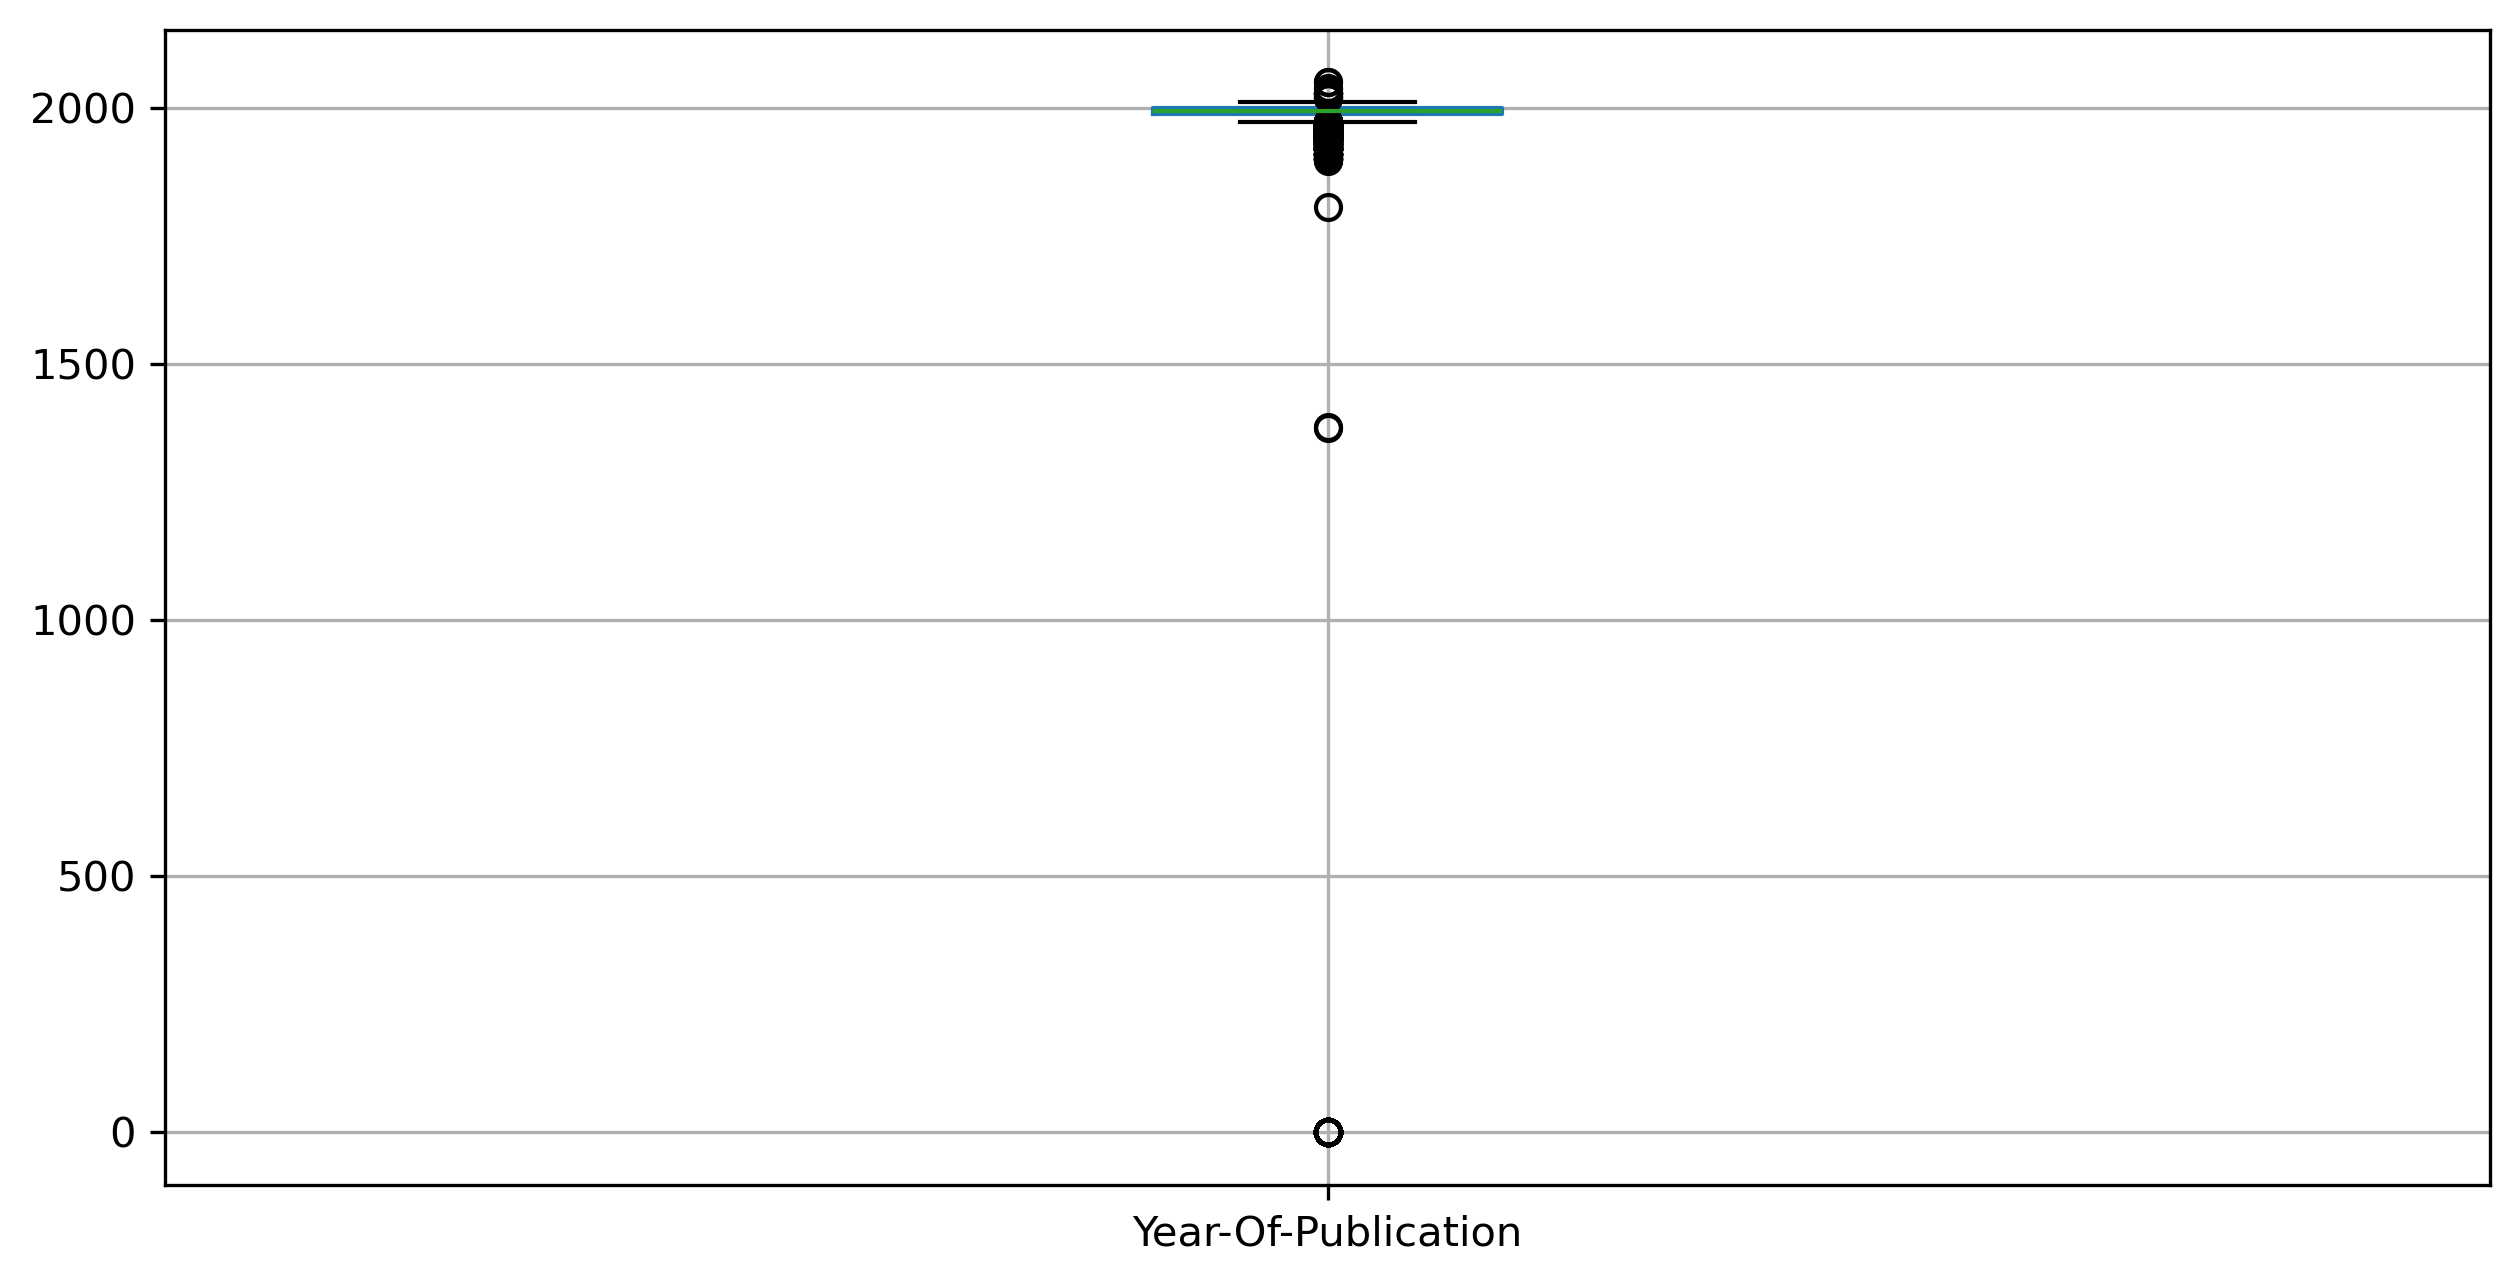

In [18]:
books.boxplot()

In [19]:
#Outlier detection function

In [21]:
Q1 = books['Year-Of-Publication'].quantile(0.25)
Q3 = books['Year-Of-Publication'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
books = books[(books['Year-Of-Publication'] >= lower_bound) & (books['Year-Of-Publication'] <= upper_bound)]

<Axes: >

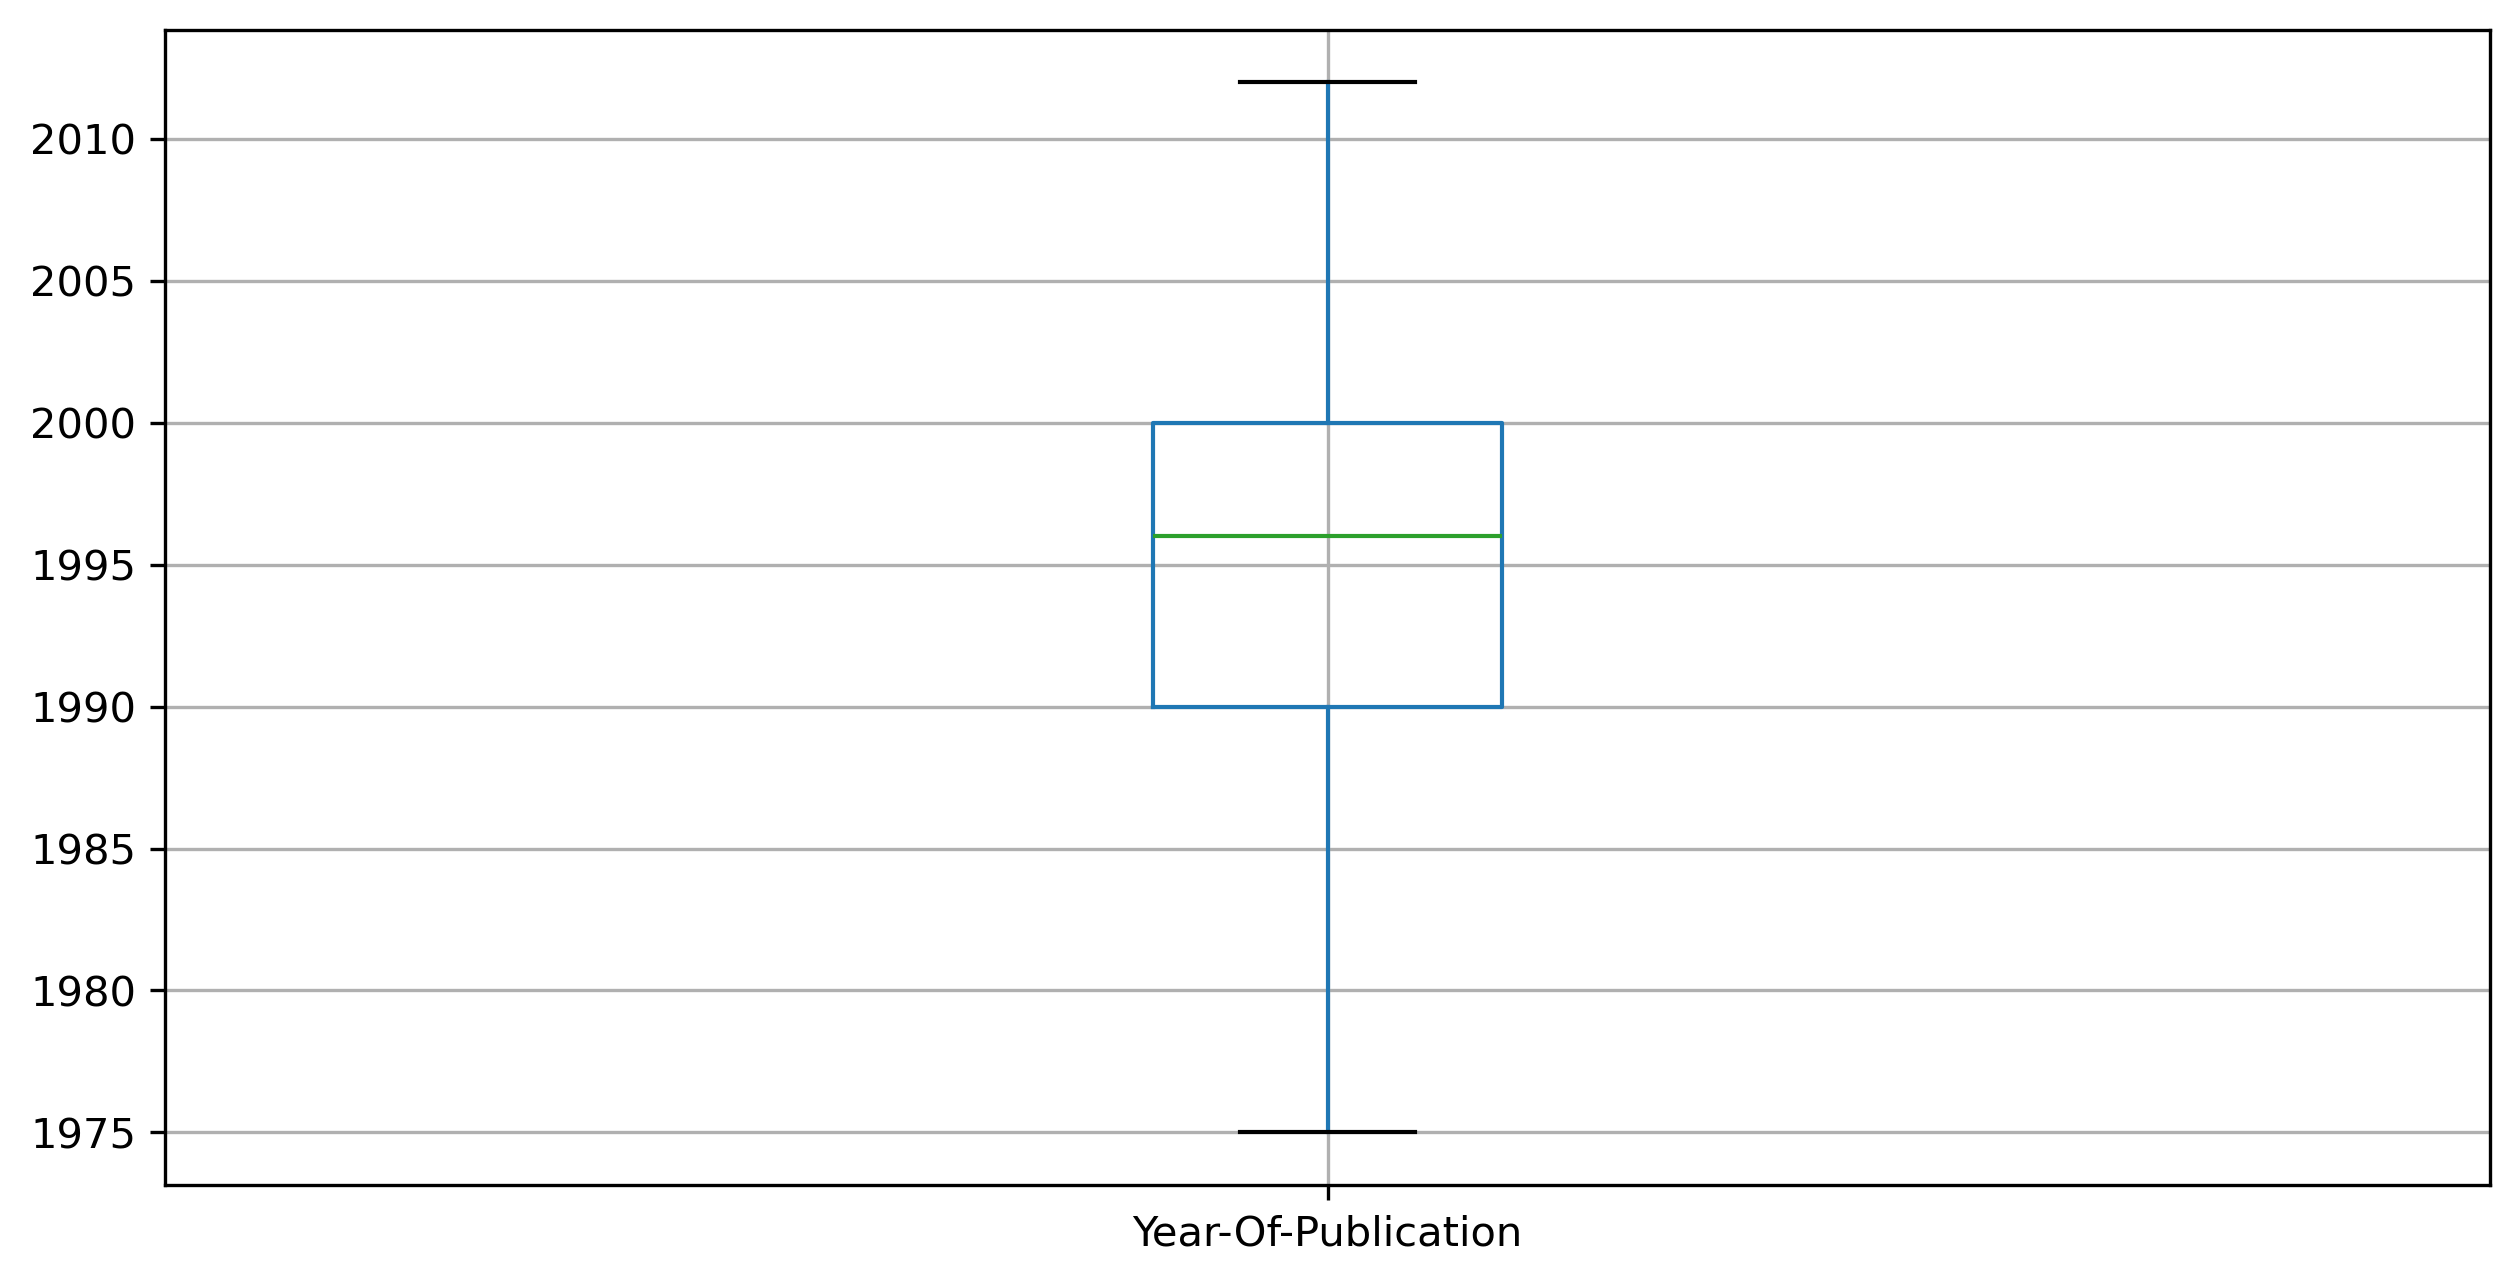

In [22]:
books.boxplot()

# Users Dataset 

In [23]:
users=pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
users.shape

(278858, 3)

In [25]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

# EDA

In [26]:
# checking the duplicate records from the books dataset 
users.duplicated().sum()

0

In [27]:
# checking the missing records 
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [28]:
#Calculate the percentage of missig values in each column.
for i in users.isna().sum():
    print((i/len(users))*100)

0.0
0.0
39.71985741847105


<Axes: >

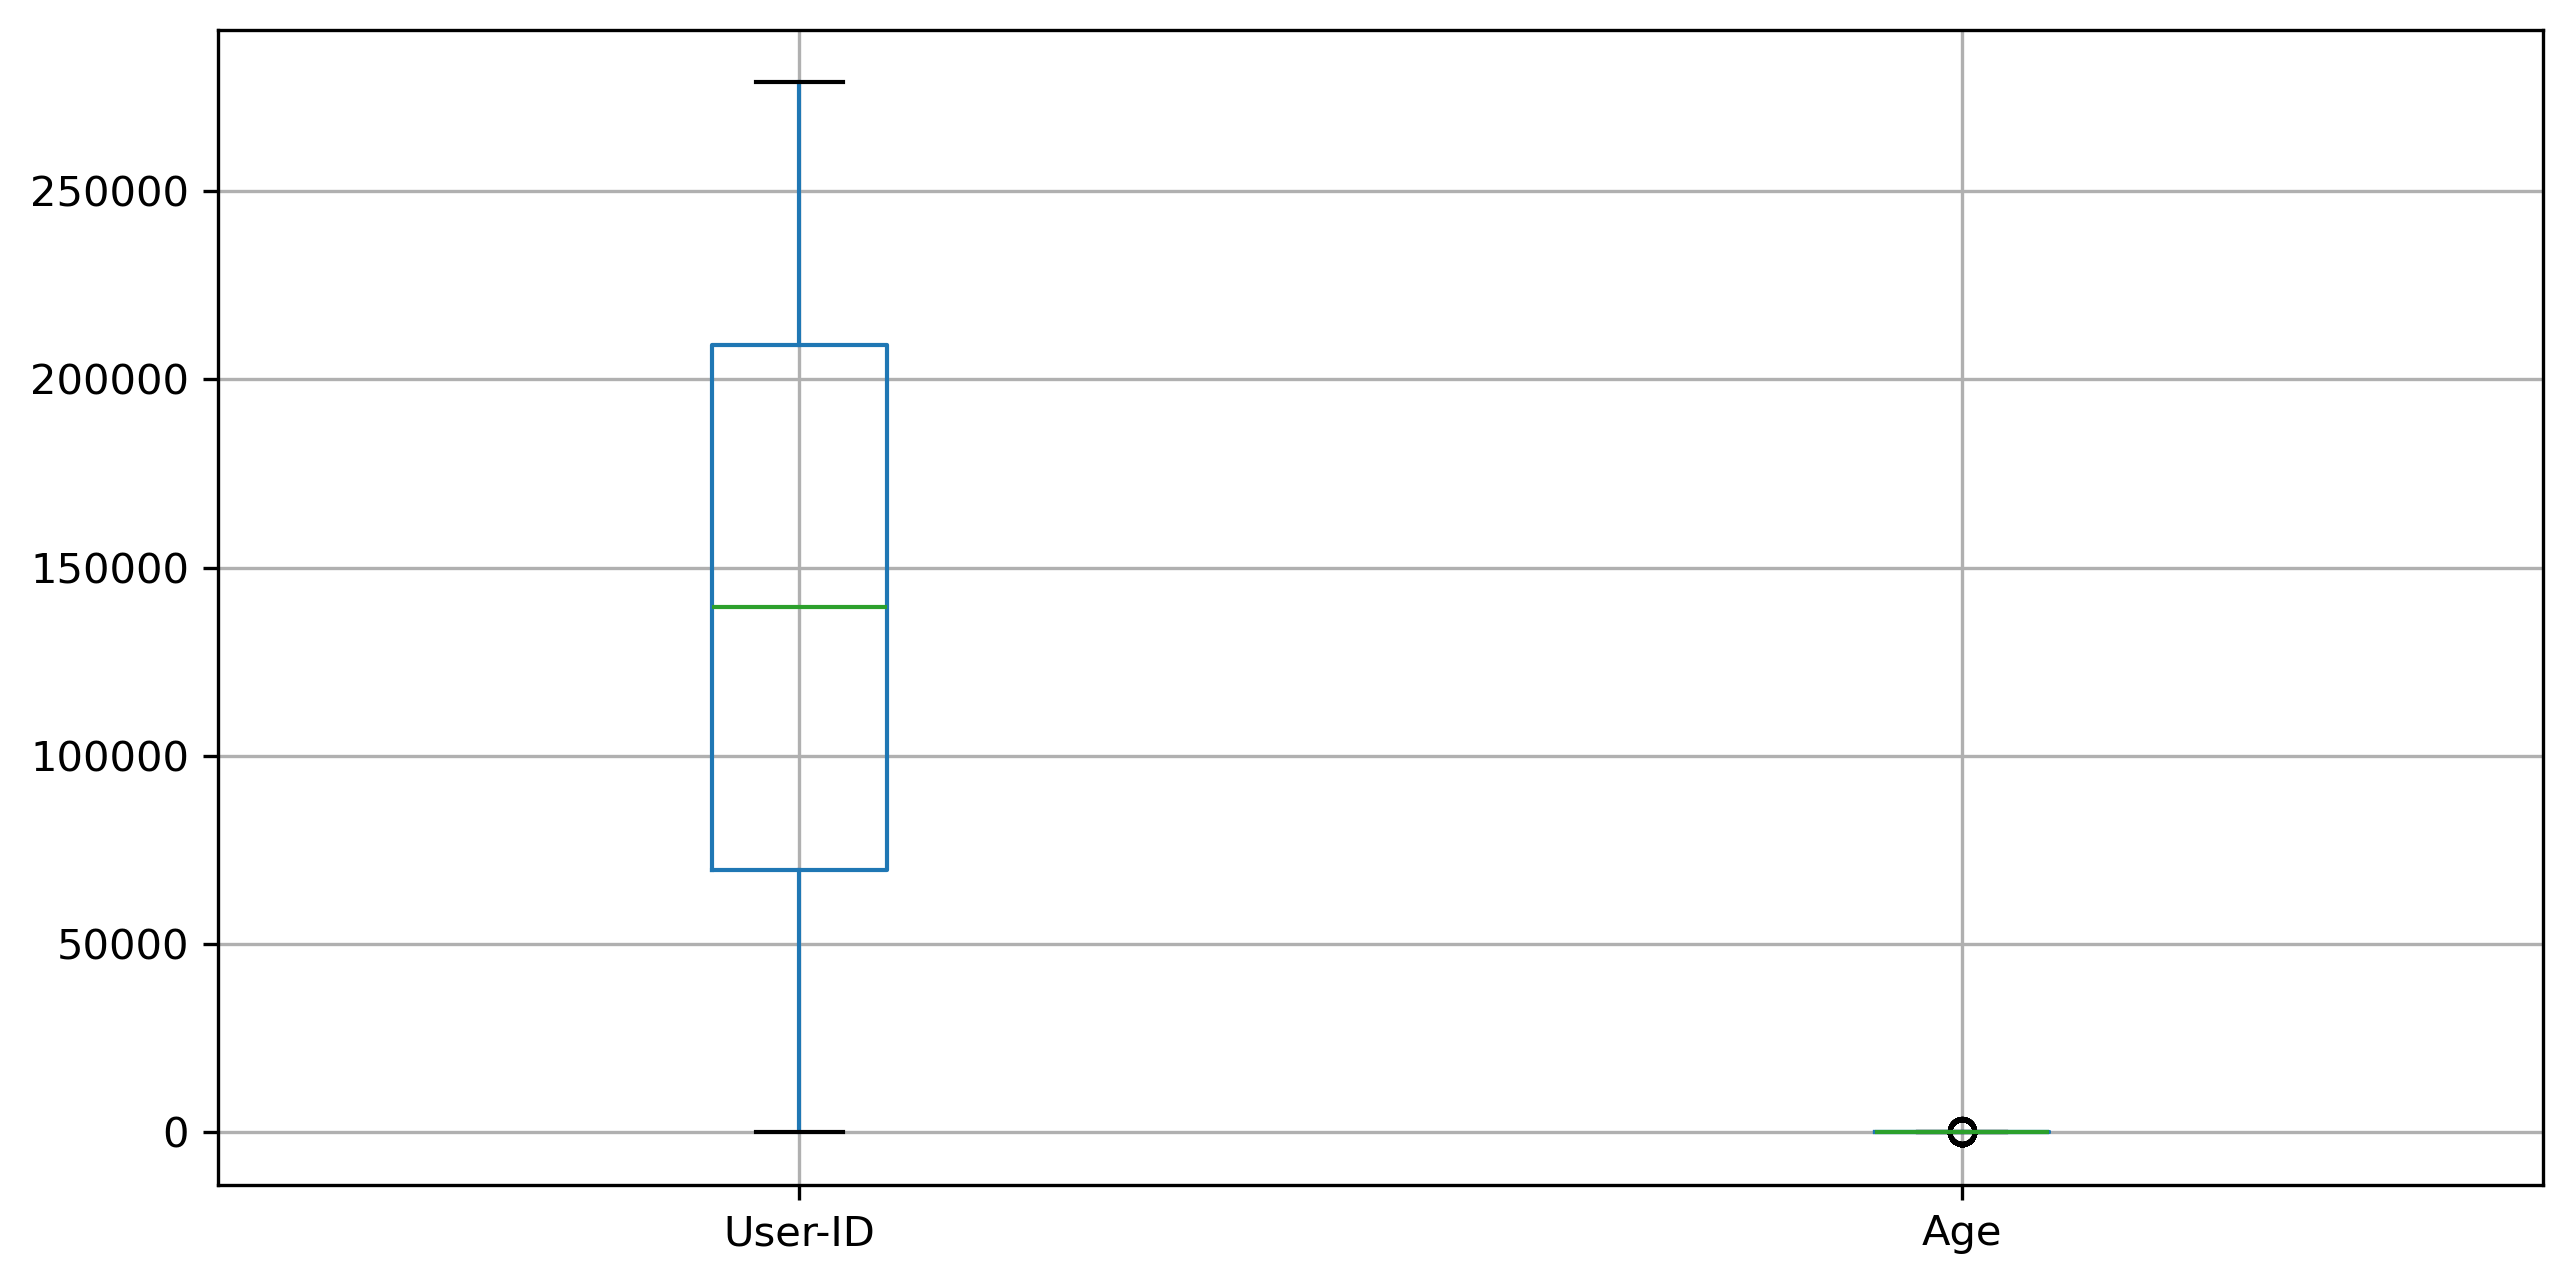

In [29]:
users.boxplot()

In [37]:
median_age=users['Age'].median()
median_age


32.0

In [38]:
users['Age'].fillna(median_age,inplace=True)

In [39]:
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

# outlier Detection

In [40]:
Q1 = users['Age'].quantile(0.25)
Q3 = users['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Step 2: Filter out the outliers
users= users[(users['Age'] >= lower_bound) & (users['Age'] <= upper_bound)]

<Axes: >

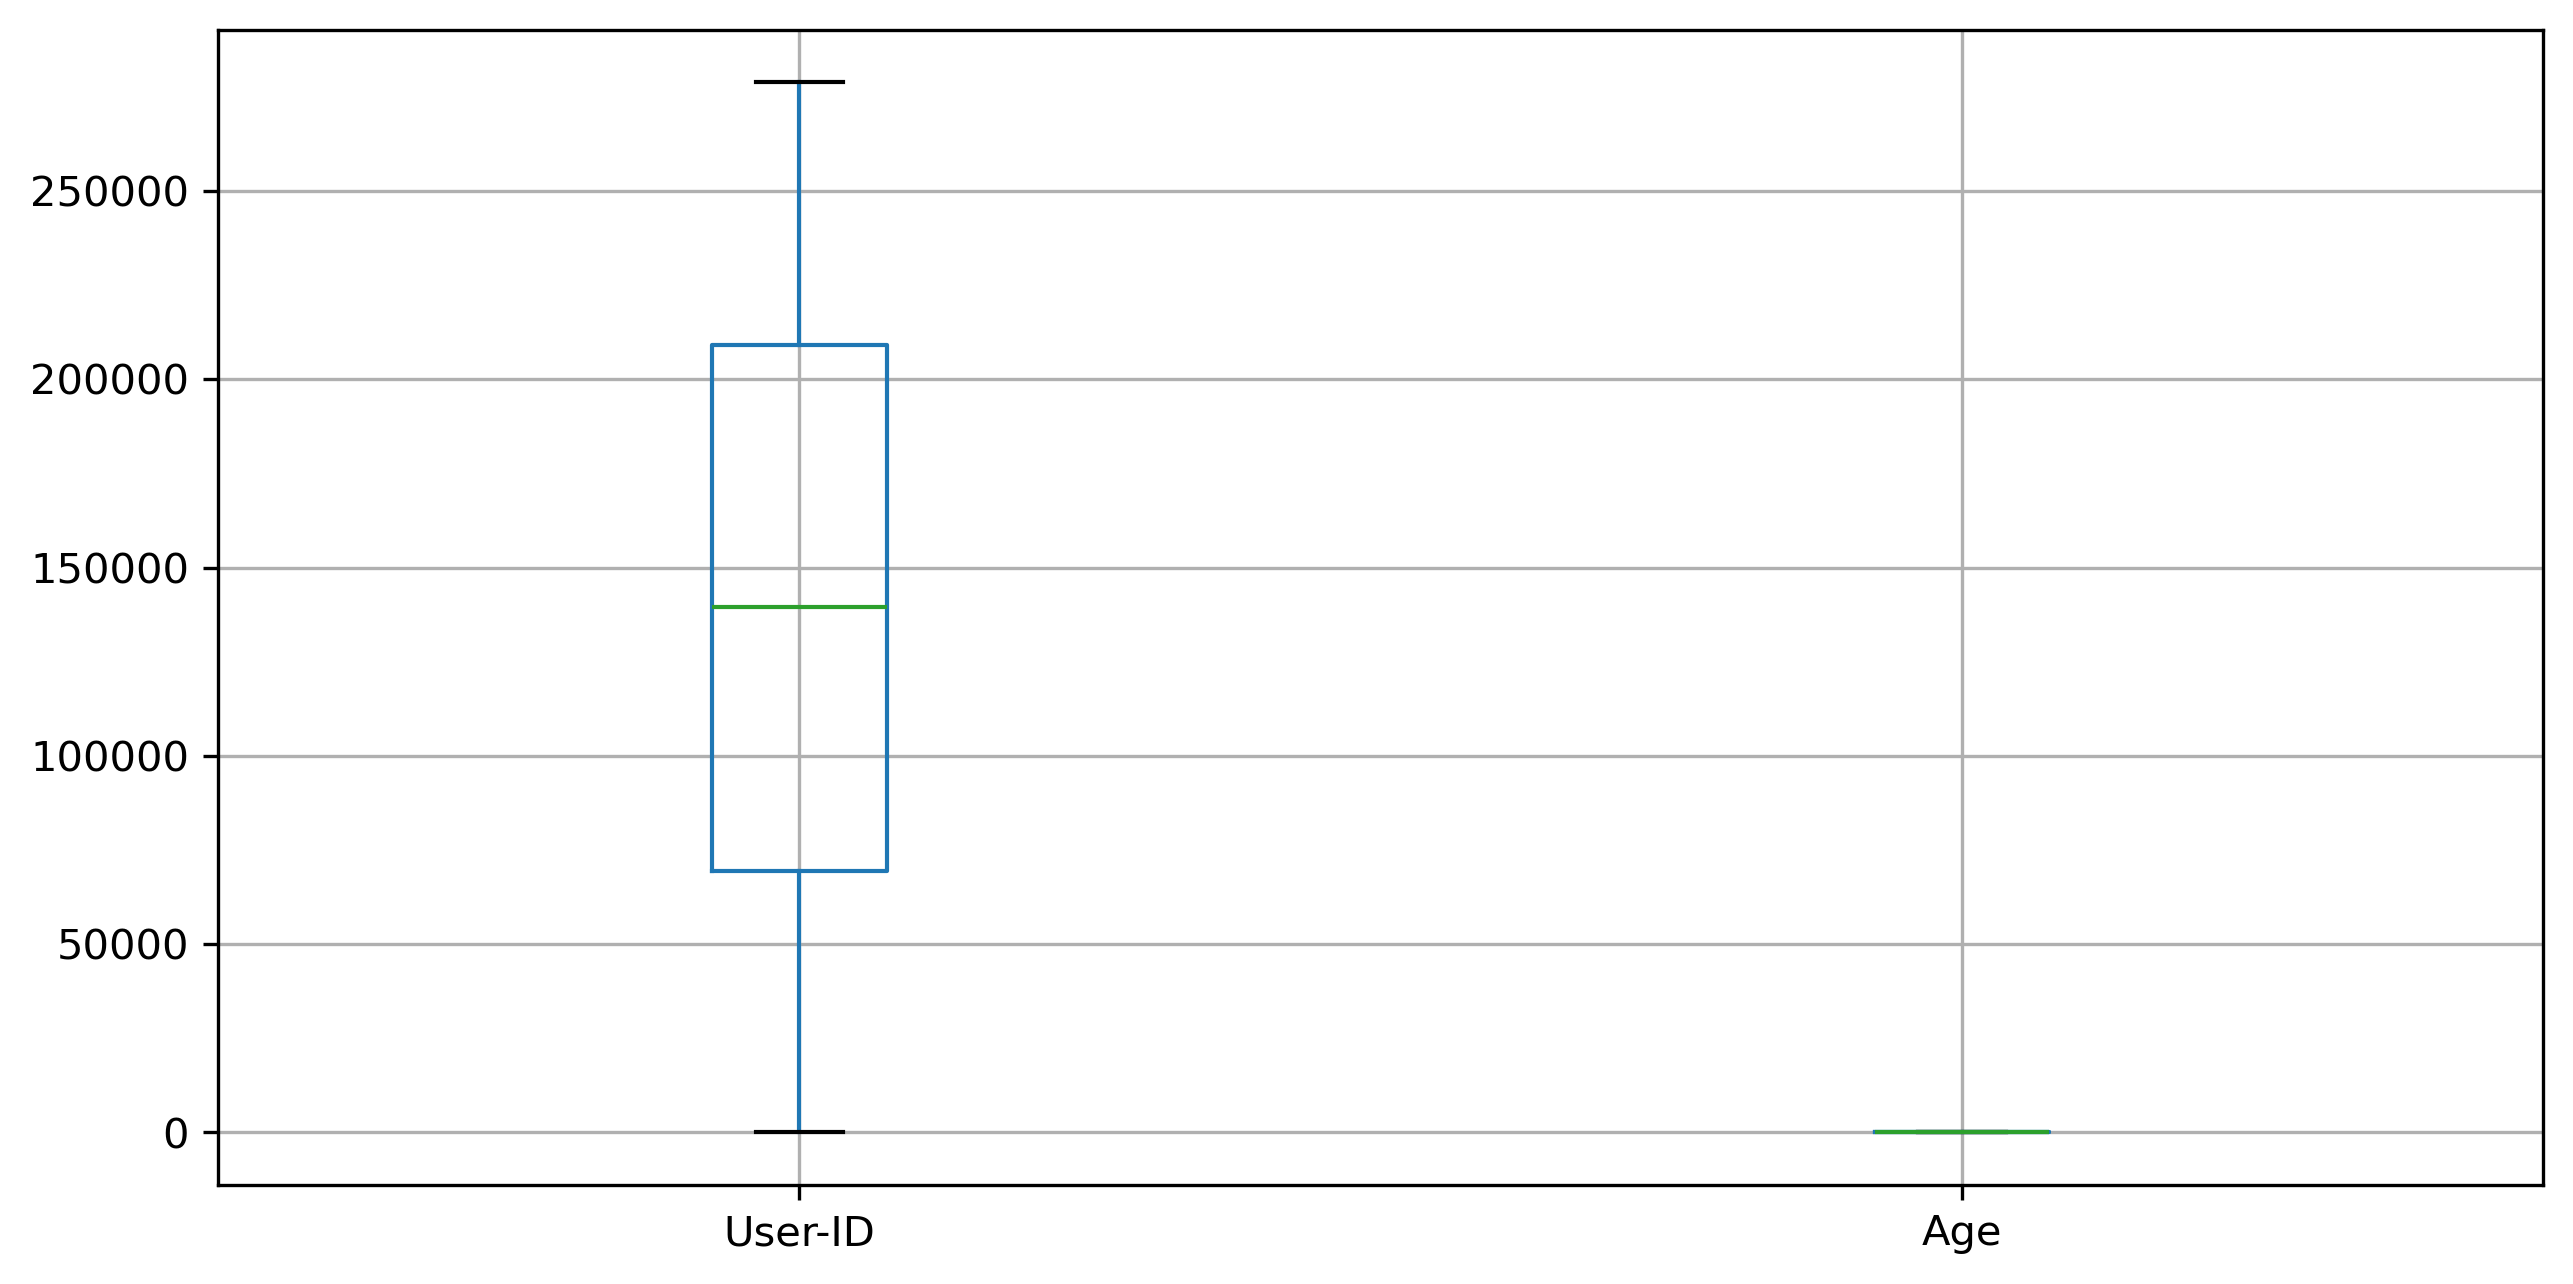

In [41]:
users.boxplot()

# Ratings Dataset 

In [42]:
ratings=pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [43]:
ratings.shape

(1149780, 3)

In [44]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [45]:
# checking the duplicate records from the books dataset 
ratings.duplicated().sum()

0

In [46]:
# checking the missing records 
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: >

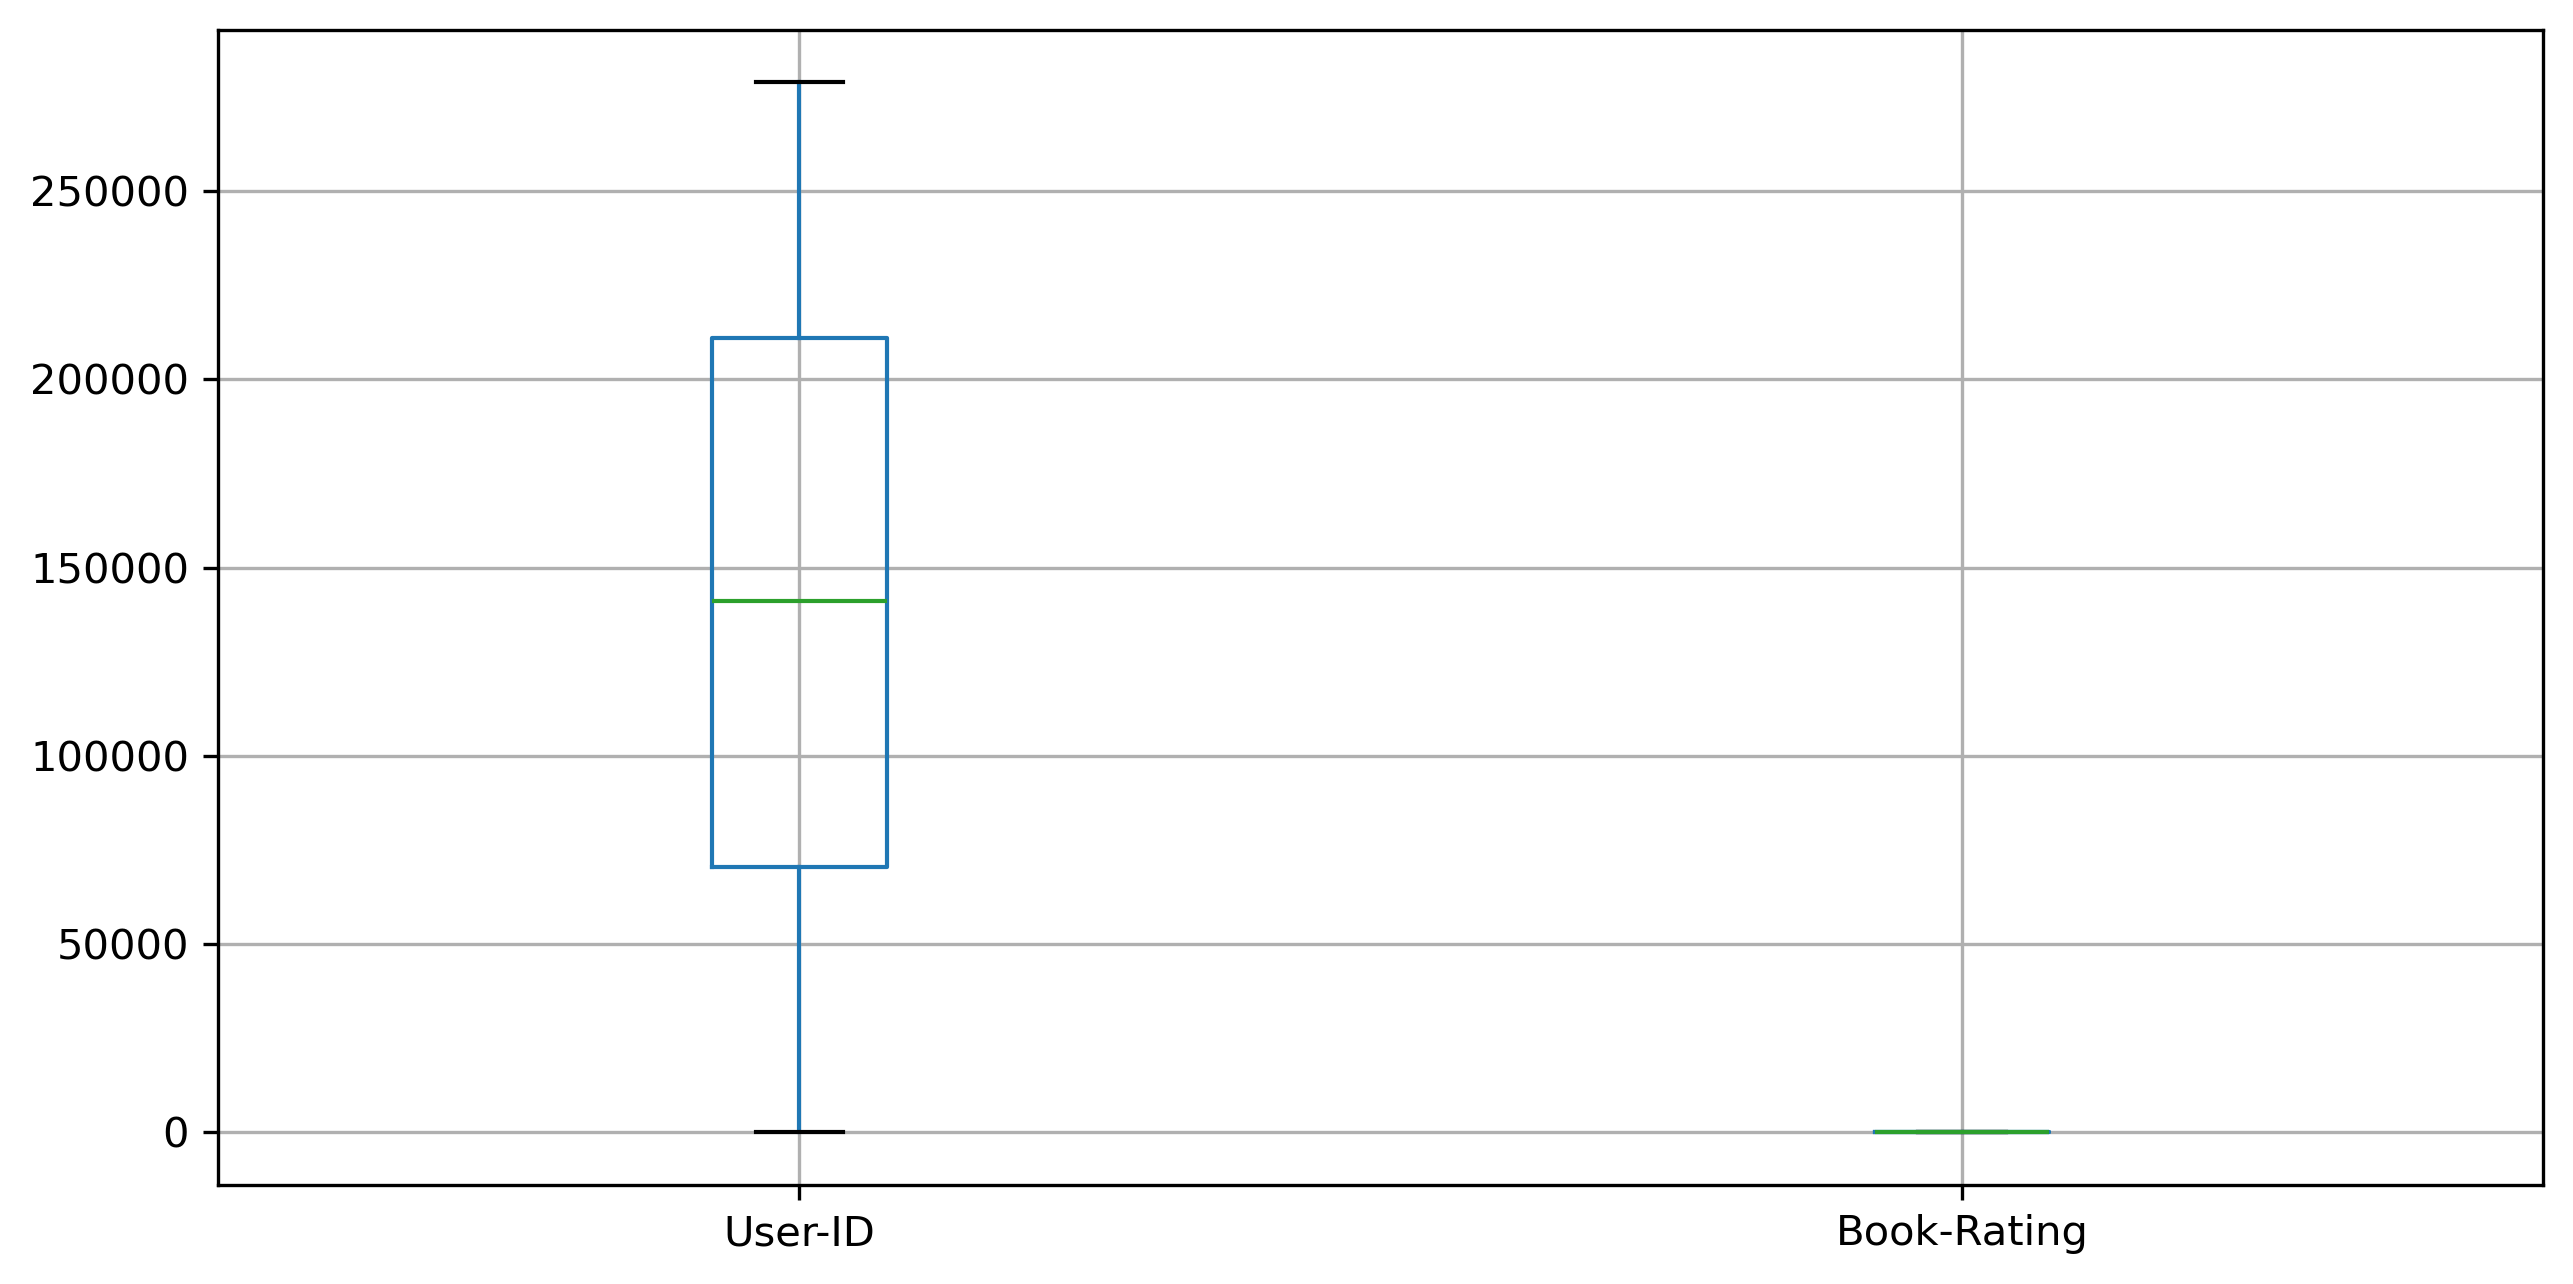

In [47]:
# outlier detection
ratings.boxplot()

# Data Visualization 

# For Books Dataset

Text(0, 0.5, 'Publisher')

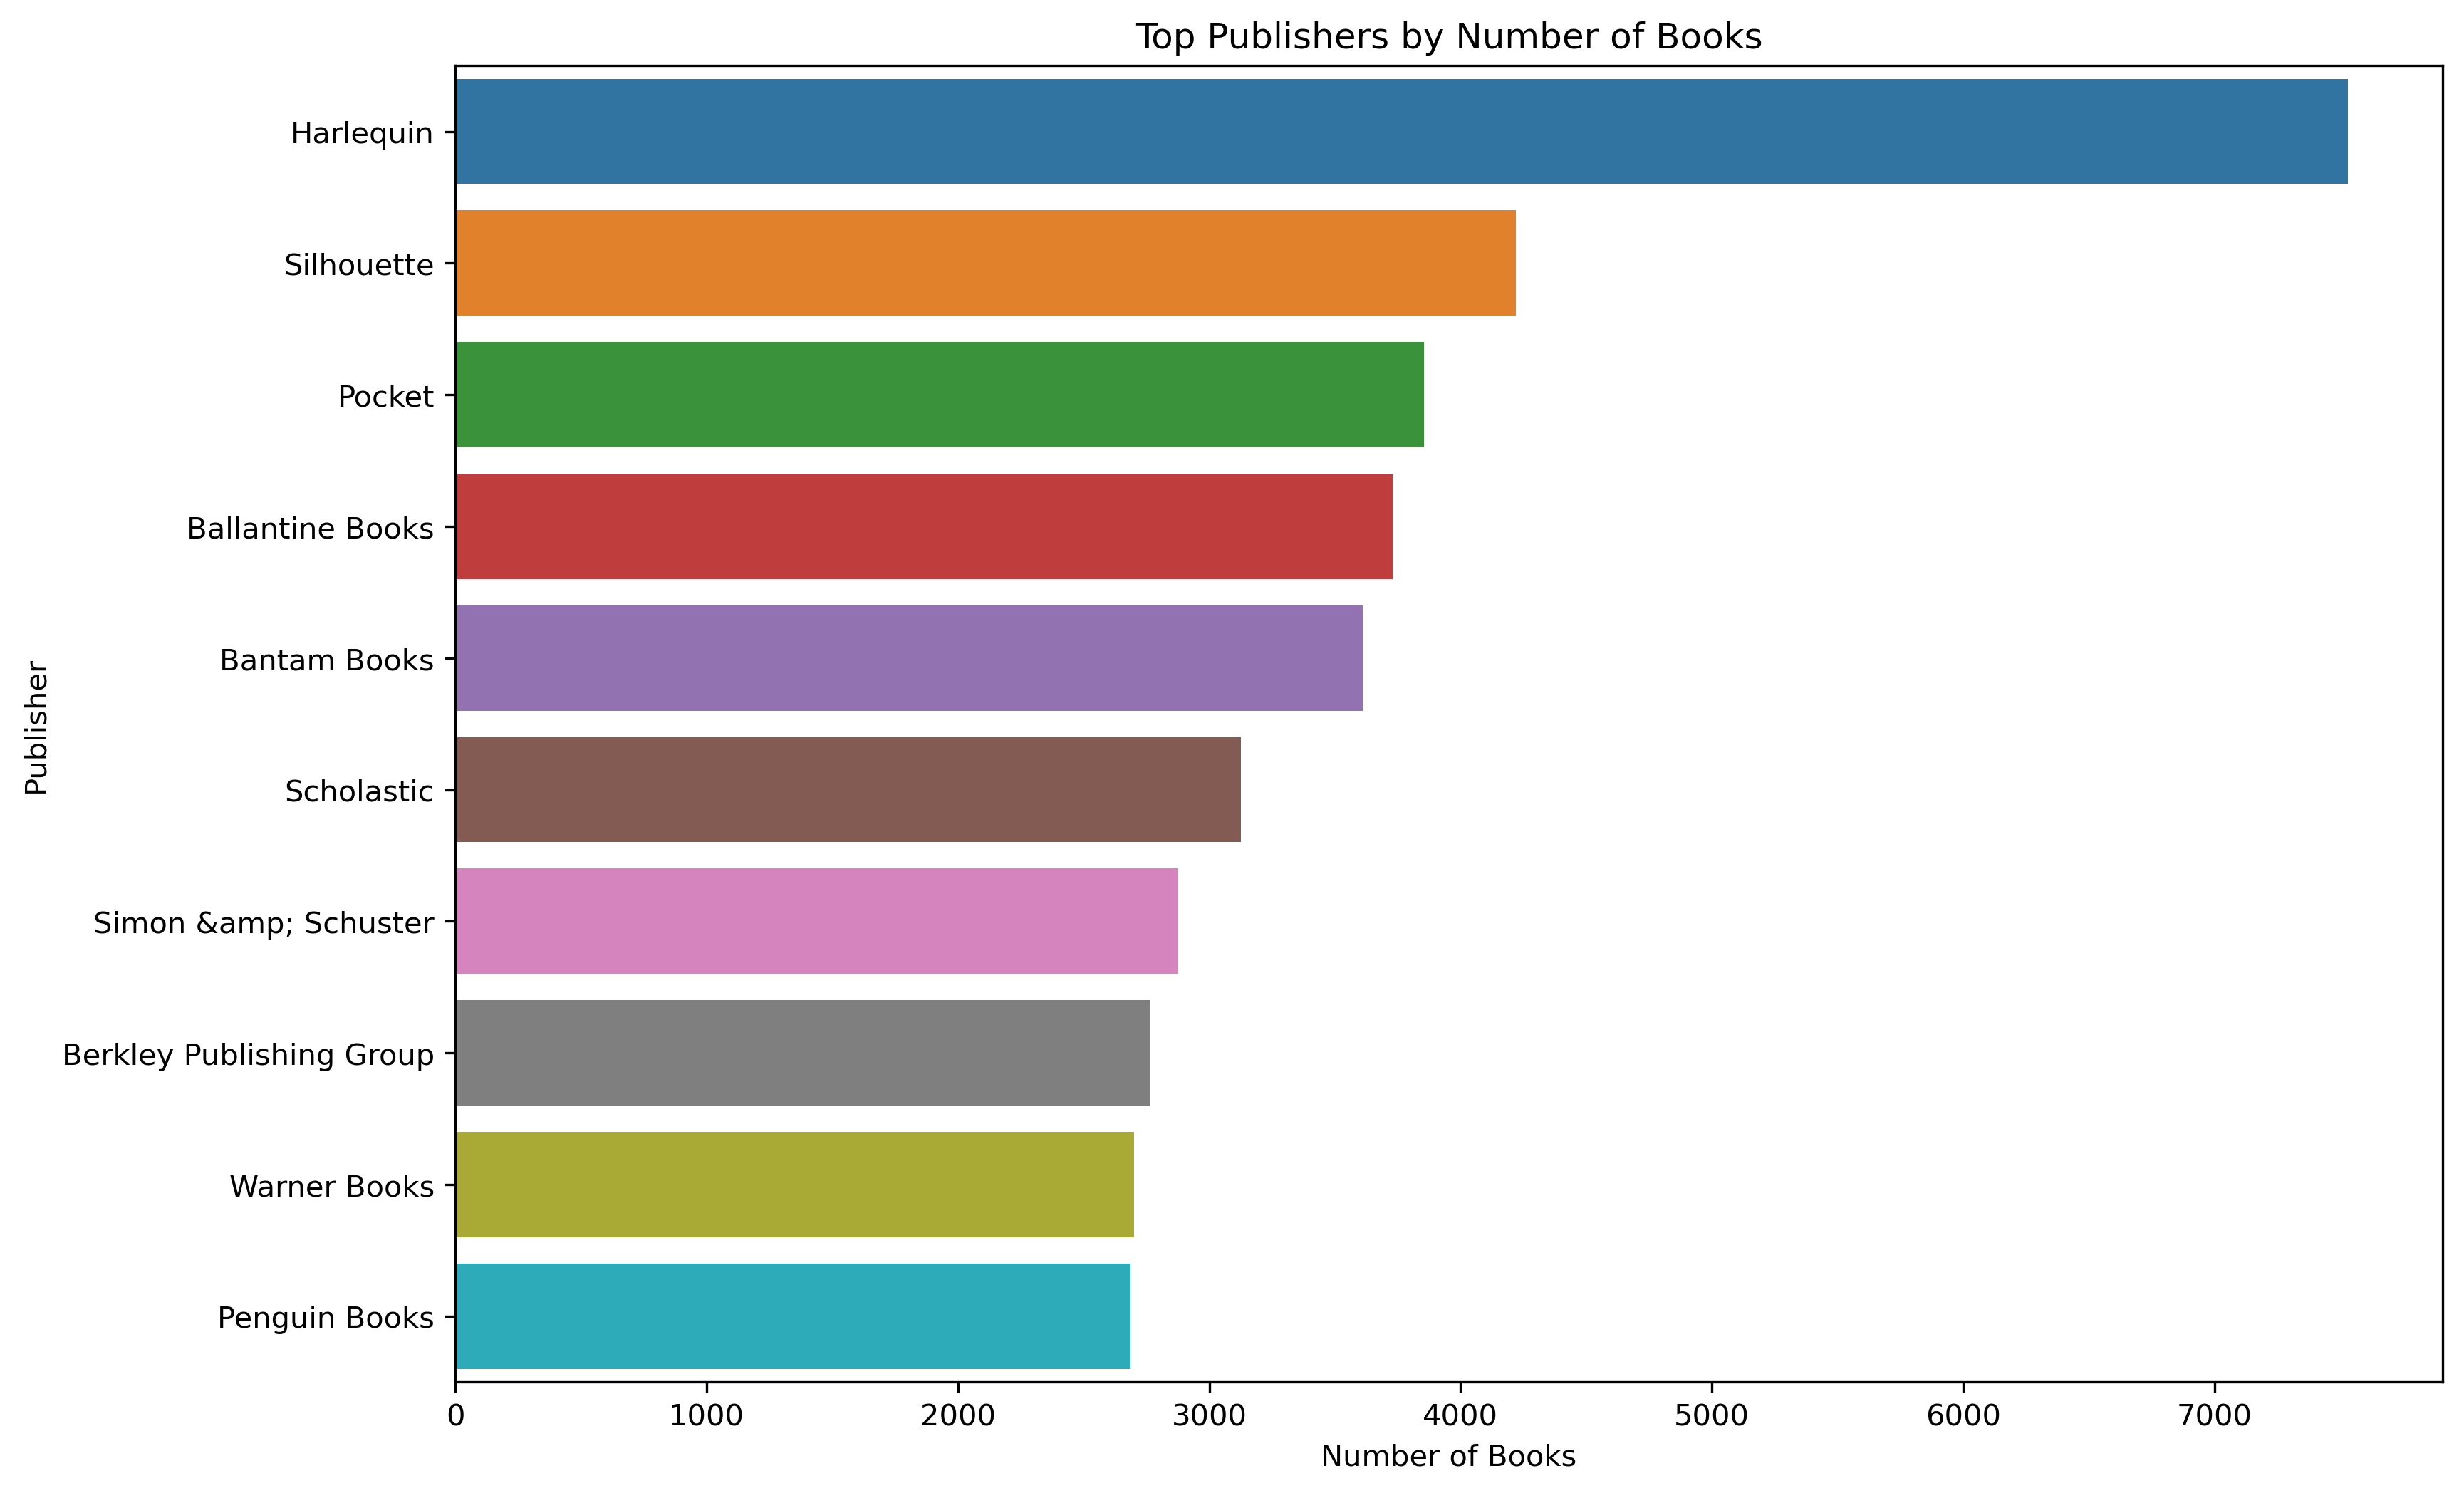

In [48]:
# Bar Plot for Top Publishers
plt.figure(figsize=(12, 8))
top_publishers = books['Publisher'].value_counts().head(10)  # Adjust to show top N publishers
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')


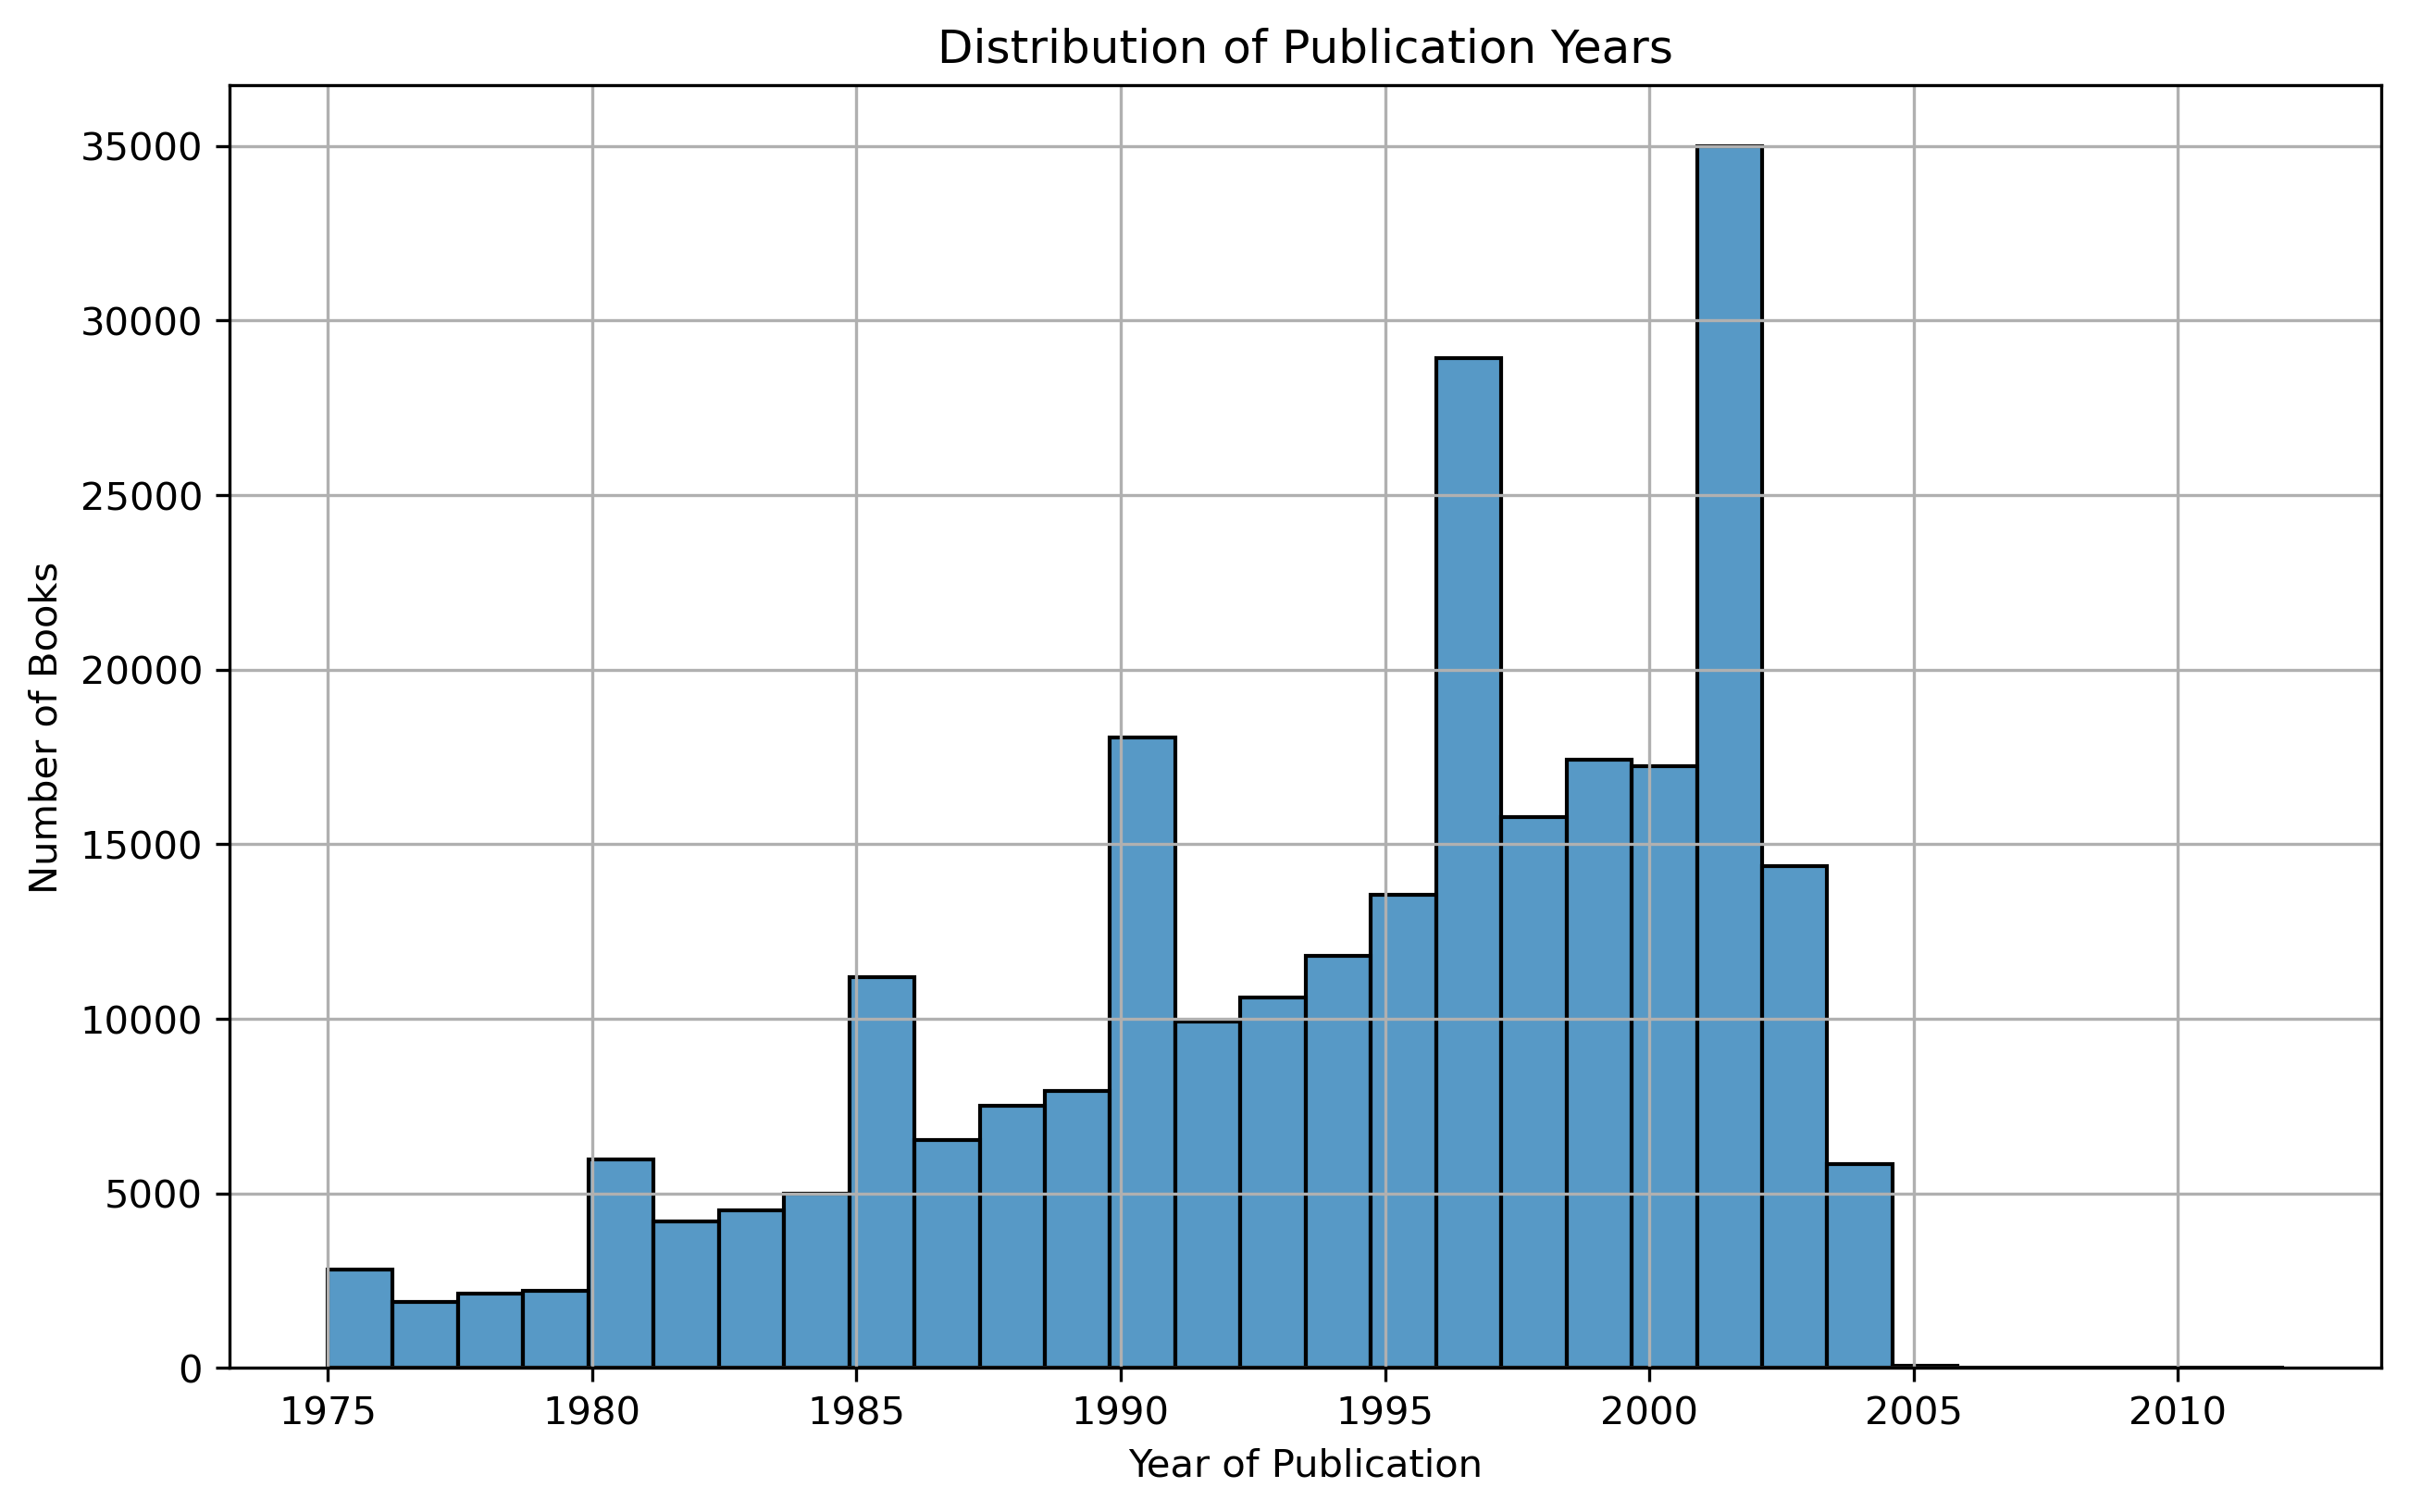

In [49]:
# Histogram for Year of Publication
plt.figure(figsize=(10, 6))
sns.histplot(books['Year-Of-Publication'], bins=30)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

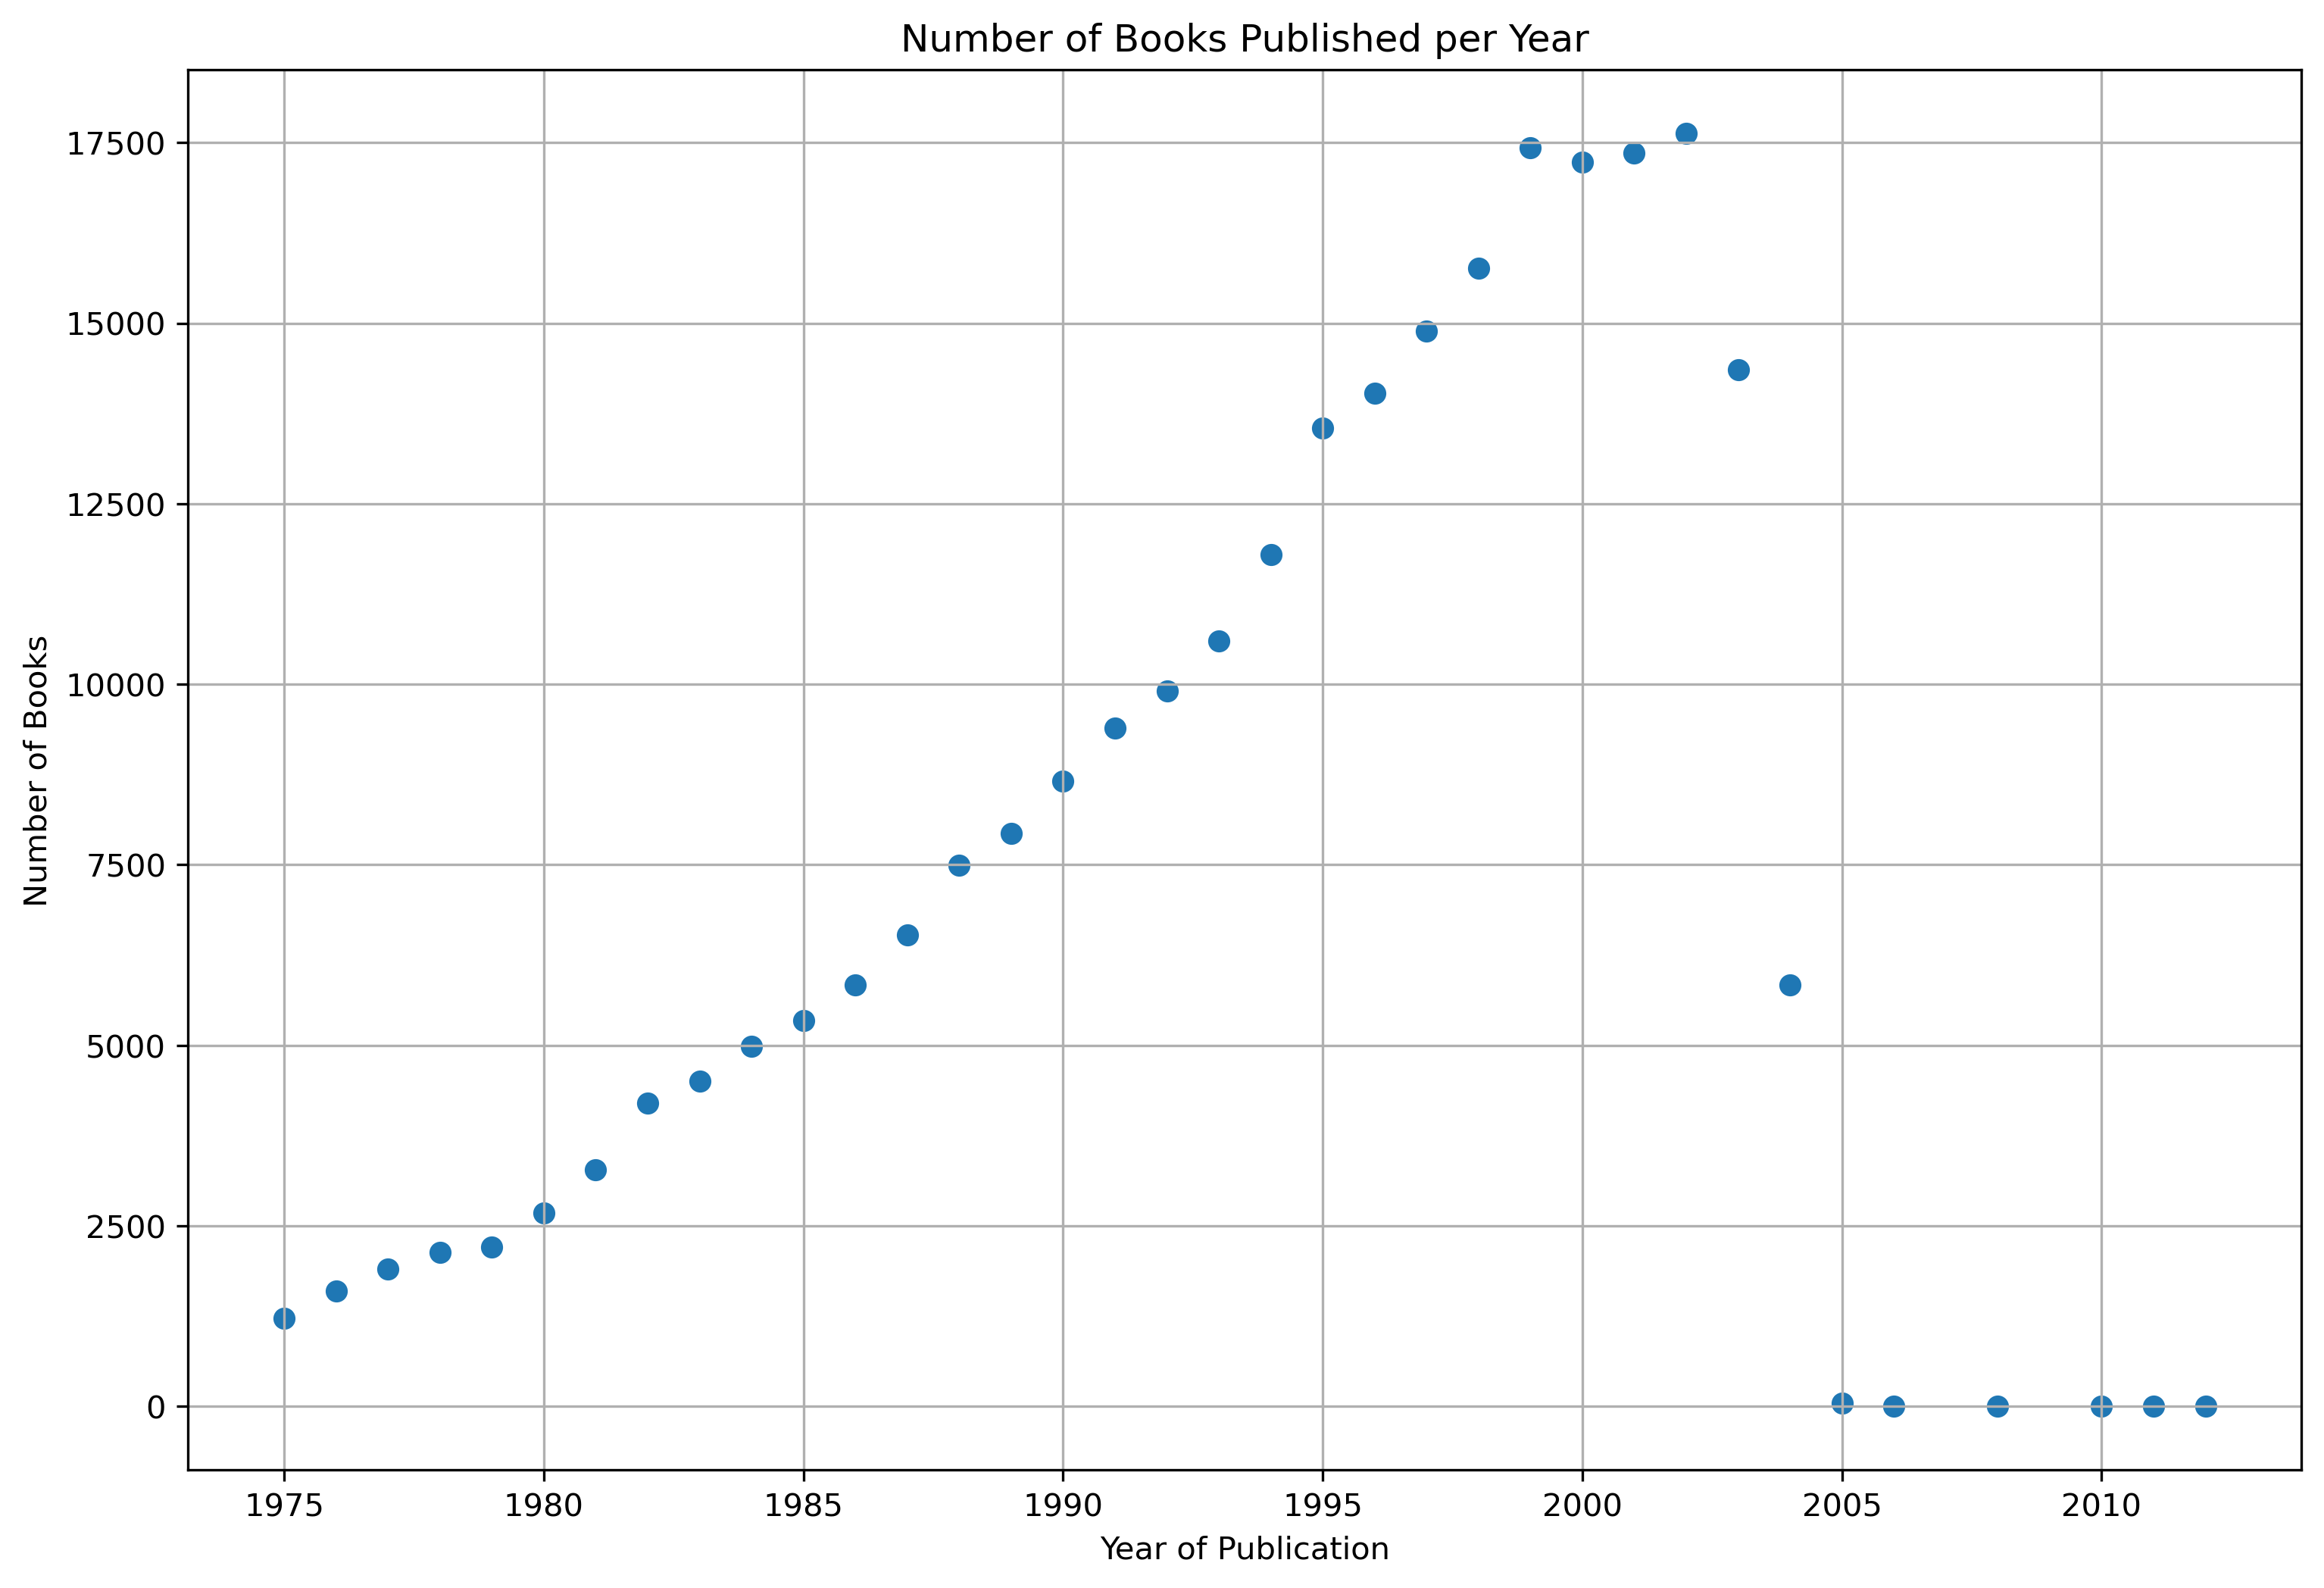

In [50]:
# Scatter Plot for Year of Publication vs. Number of Books
year_counts = books['Year-Of-Publication'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
plt.scatter(year_counts.index, year_counts.values)
plt.title('Number of Books Published per Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.grid(True)


# For Users Dataset 

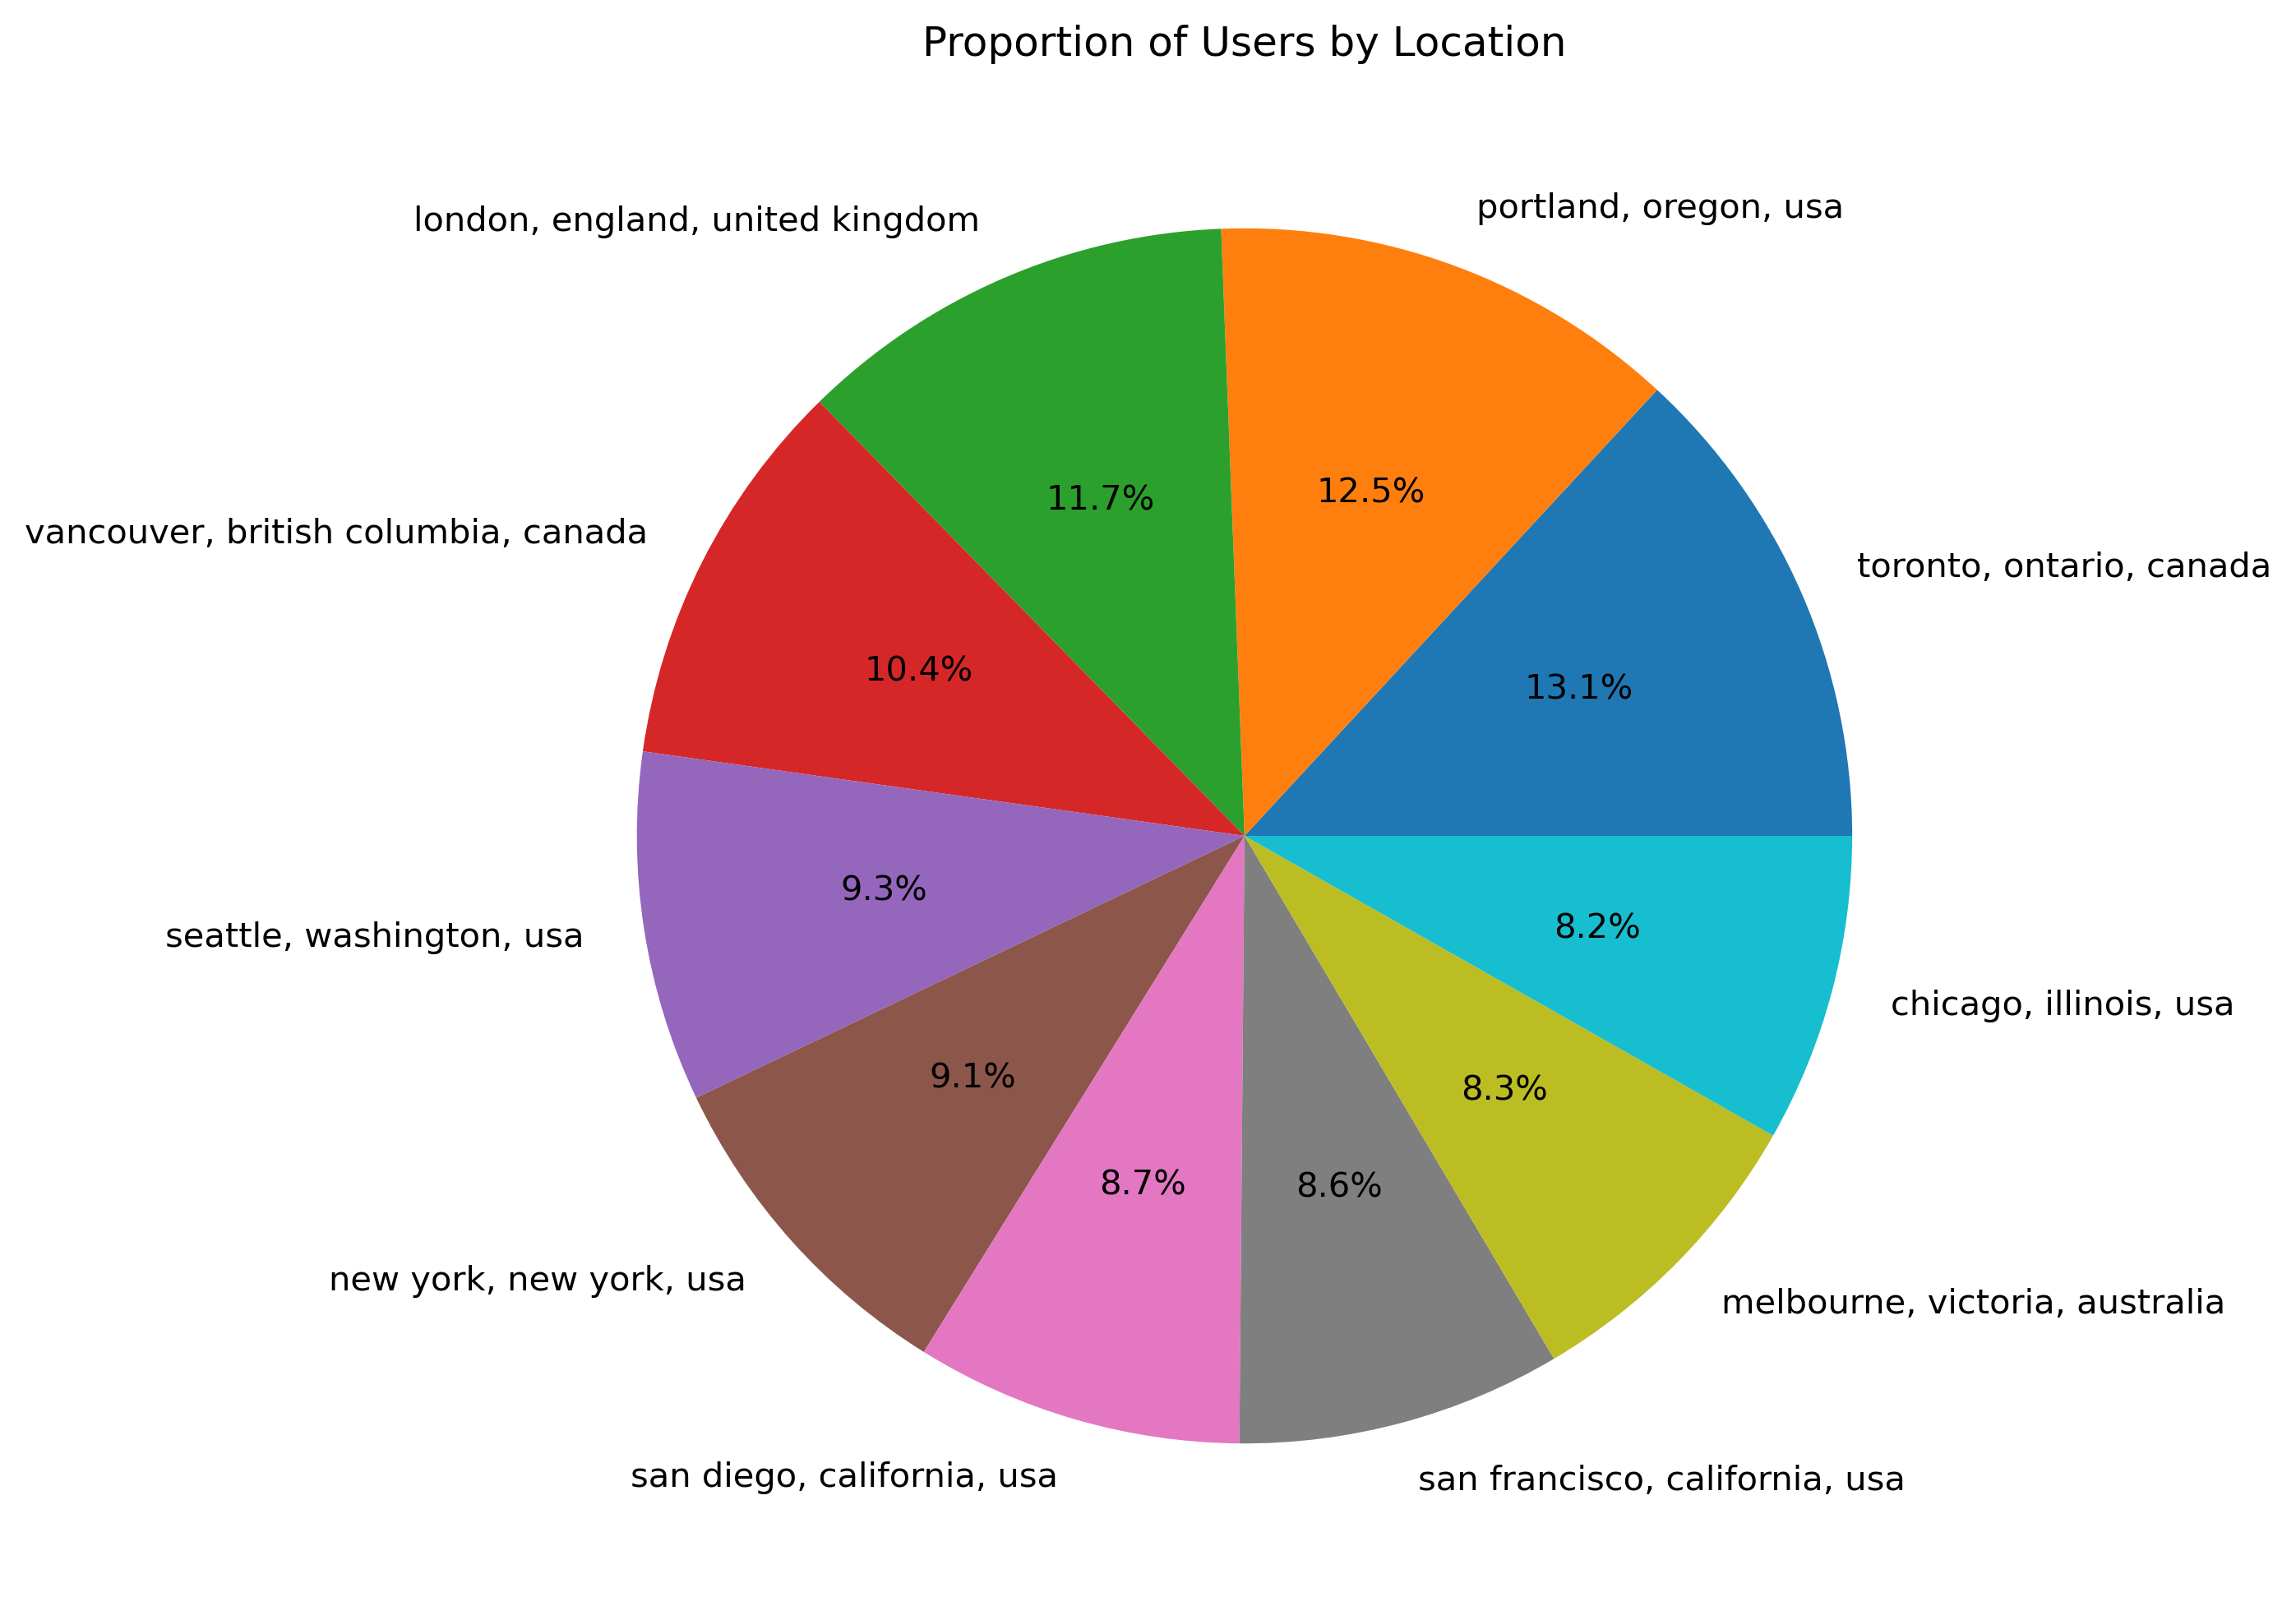

In [51]:
# Pie Chart for Location proportions
plt.figure(figsize=(12, 8))
location_counts = users['Location'].value_counts().head(10)  # Adjust the number to show top N locations
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Users by Location')
plt.show()


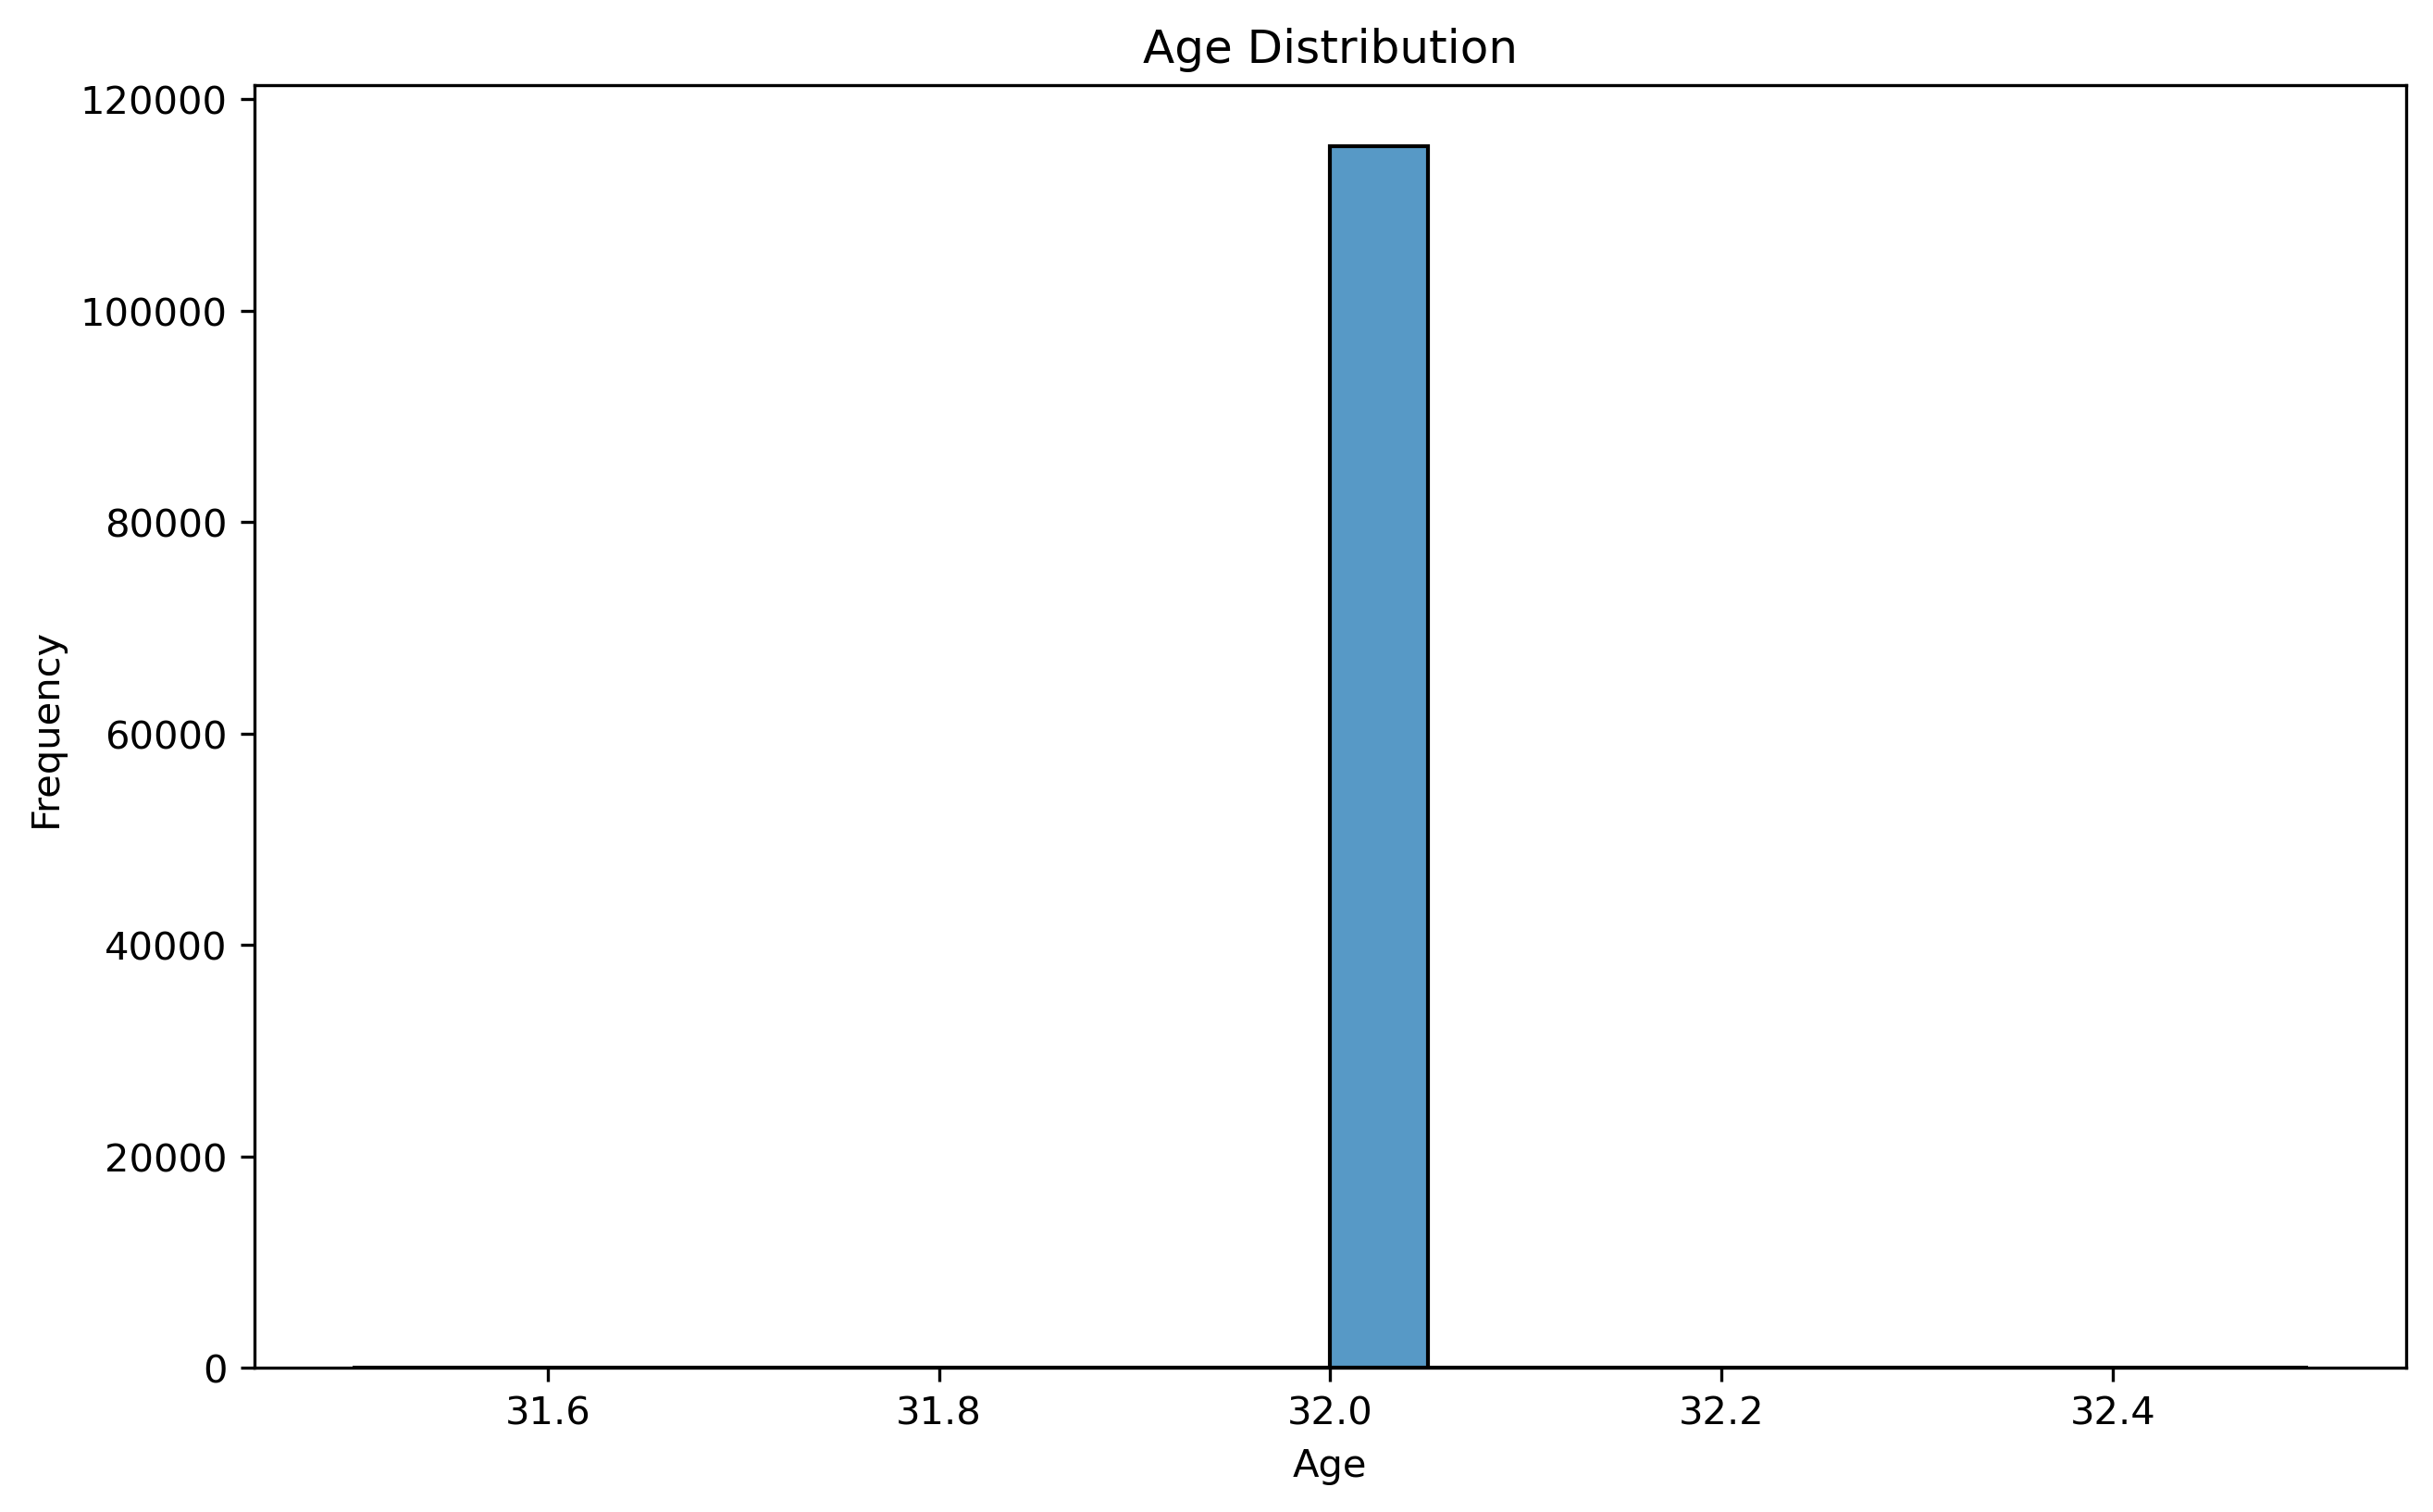

In [52]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# For Ratings Dataset

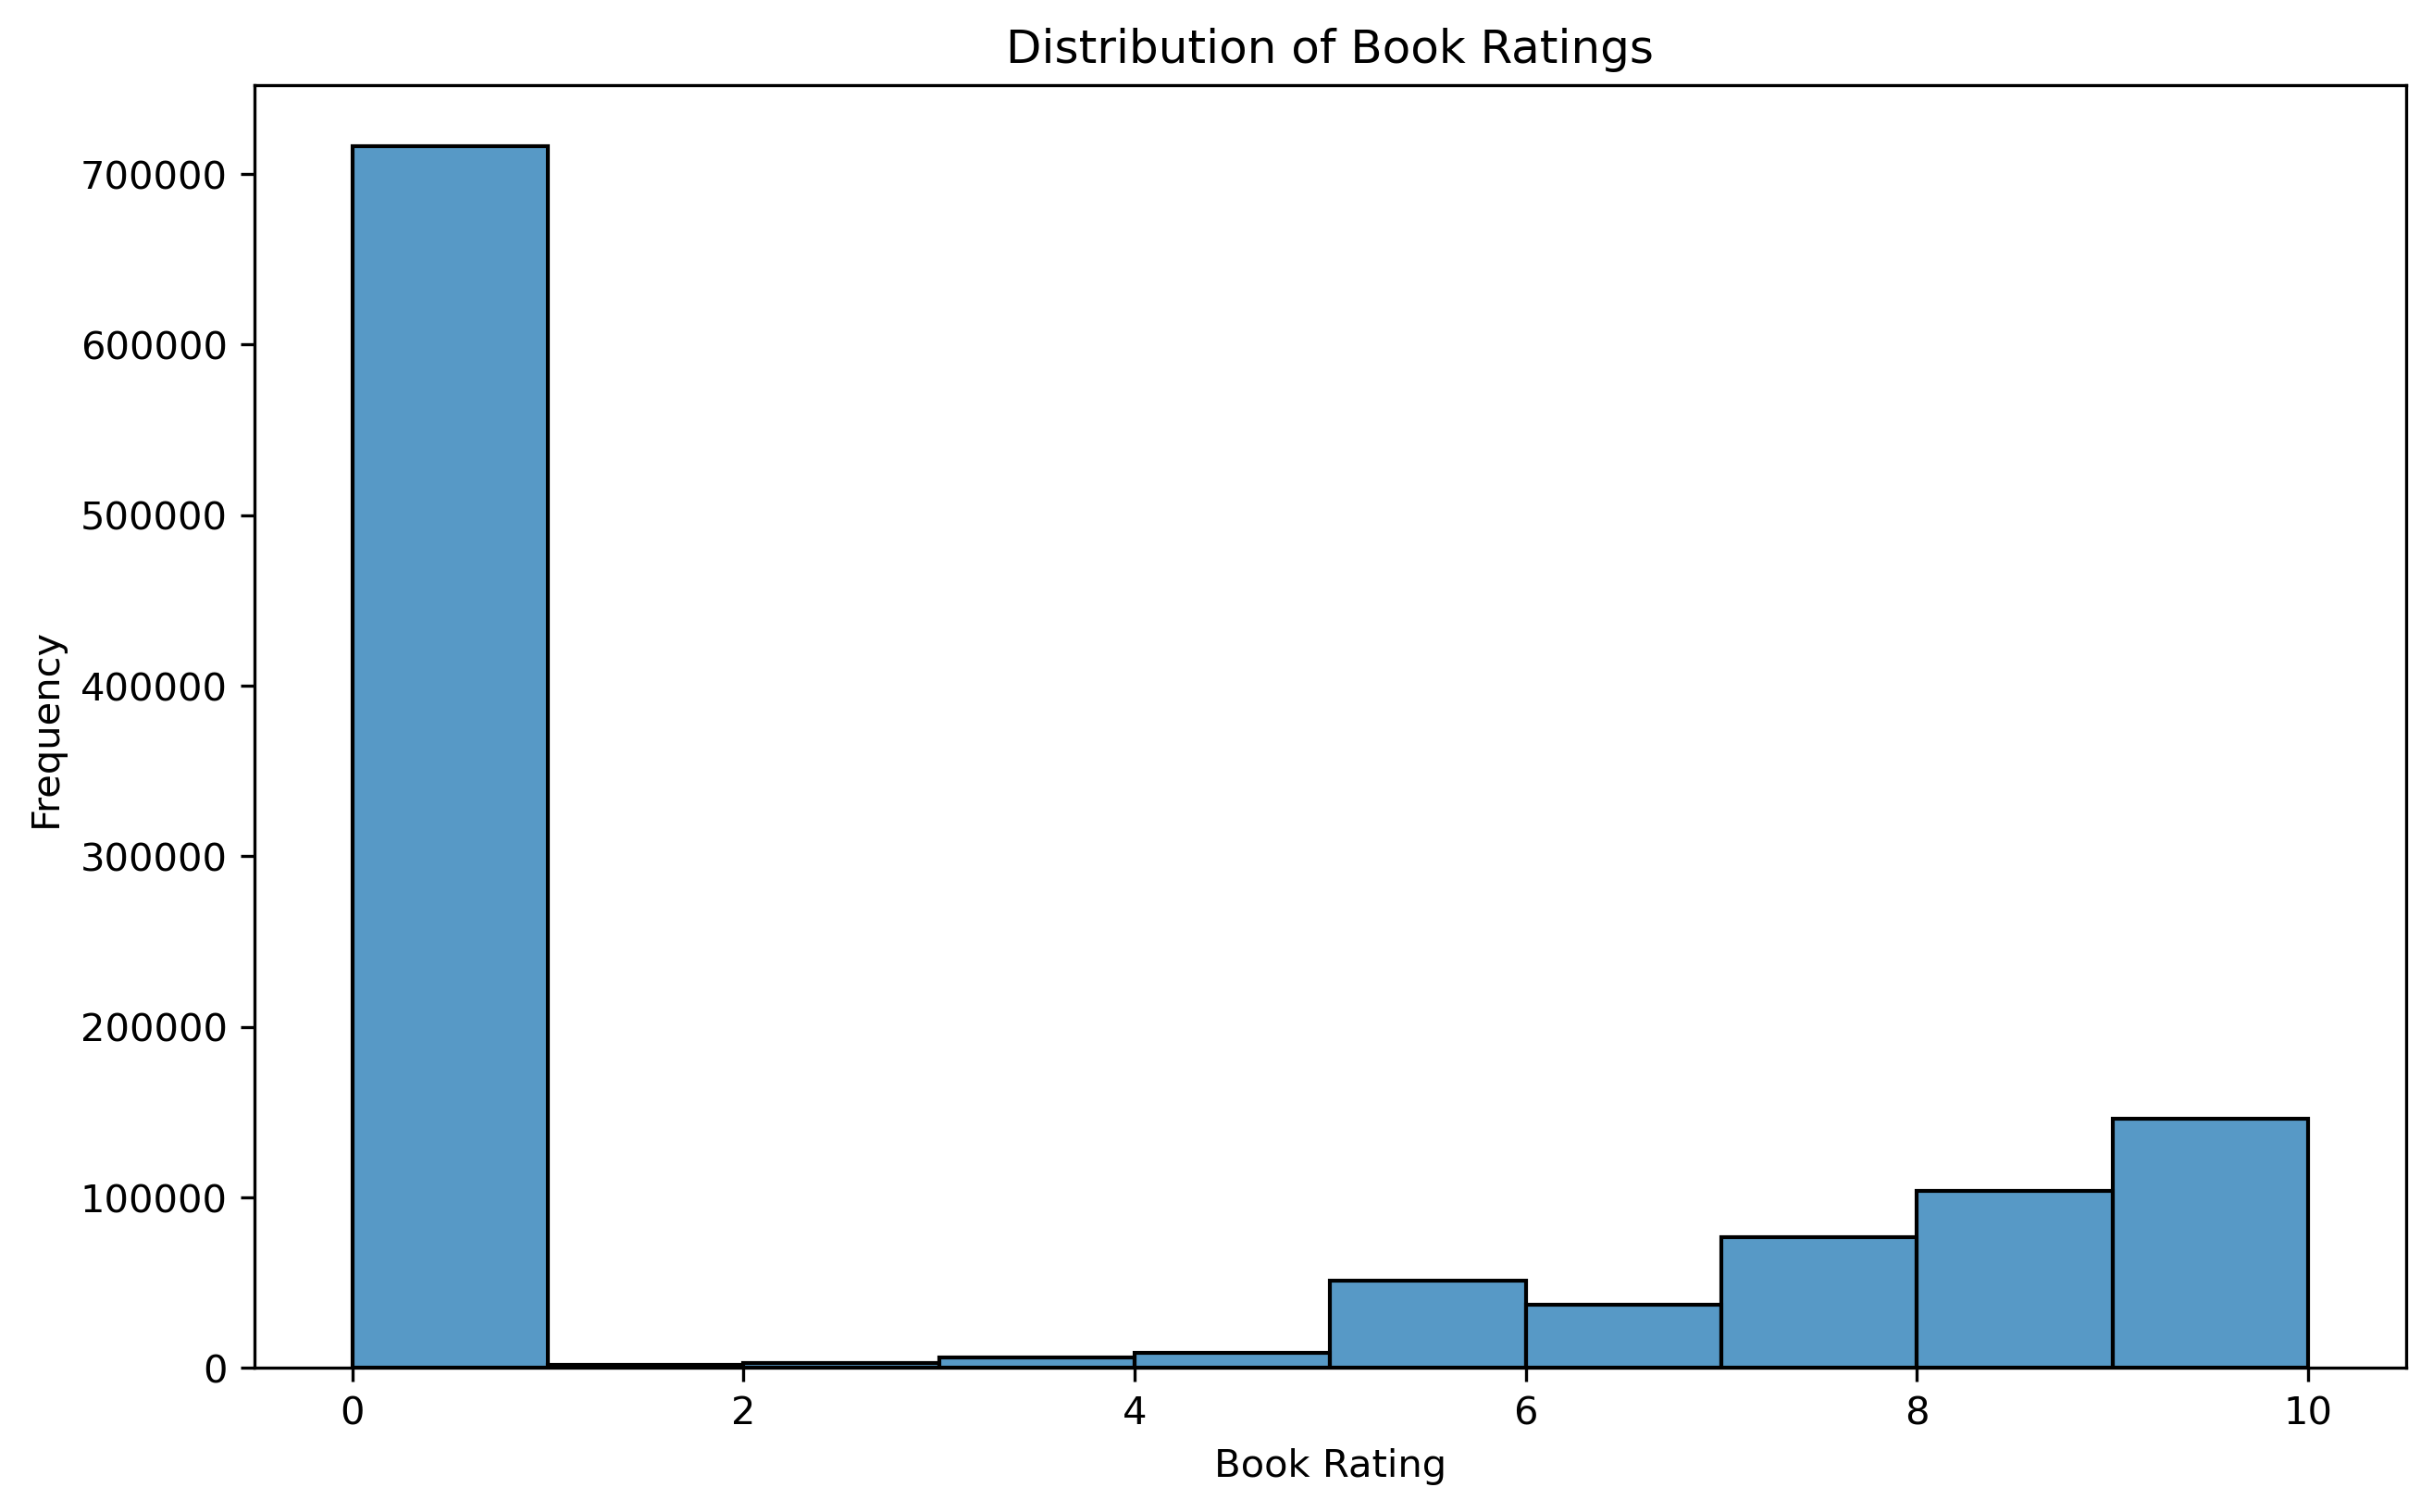

In [53]:

plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()


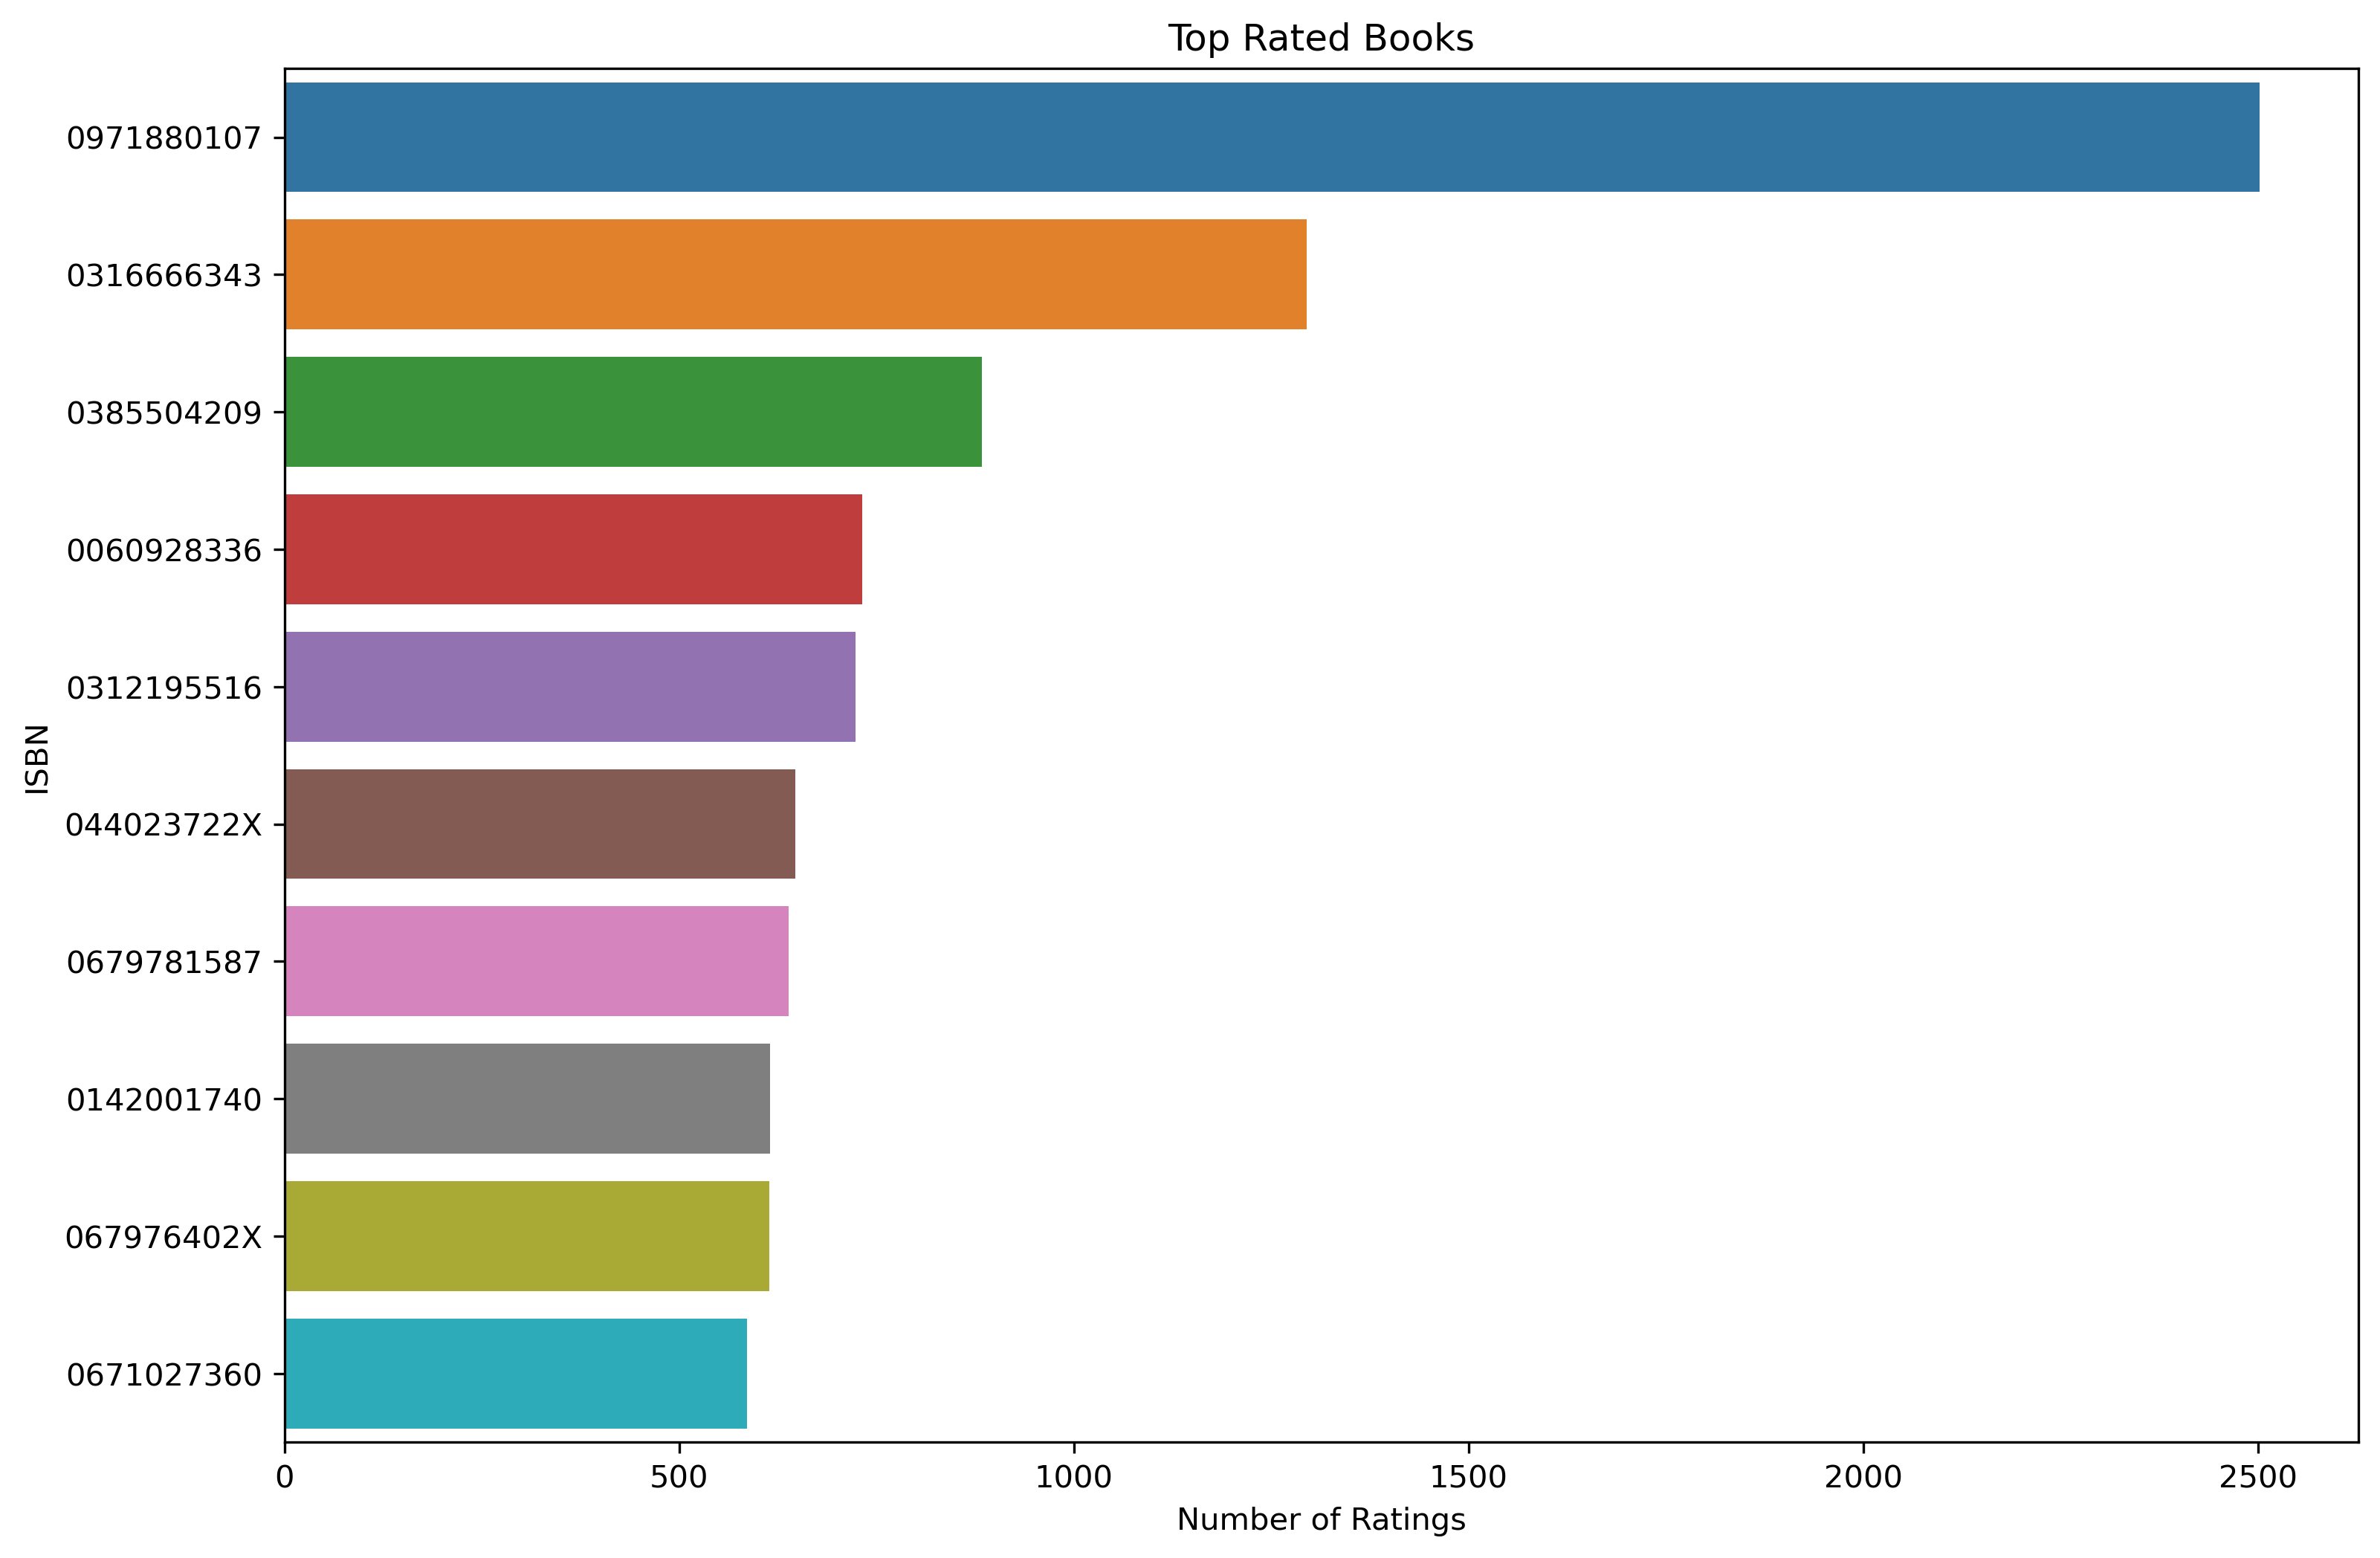

In [54]:
top_rated_books = ratings['ISBN'].value_counts().head(10)  # Top 10 books by number of ratings
plt.figure(figsize=(12, 8))
sns.barplot(x=top_rated_books.values, y=top_rated_books.index)
plt.title('Top Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('ISBN')
plt.show()


# Model Building 

In [55]:
books = books[["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-M"]]

In [56]:
books.rename(columns={"Book-Title":"title",
                      "Book-Author":"author",
                      "Year-Of-Publication":"year",
                      "Publisher":"publisher",
                     "Image-URL-M":"img_url"},inplace=True)

In [57]:
ratings.rename(columns={"User-ID":"user_id","Book-Rating":"rating"},inplace=True)

In [58]:
#Since there are so many unique users so we will filter the needed records based on a certain threshold lets say if a person rated 30+ books is of some use for our system
threshold = 30
X = ratings["user_id"].value_counts() > threshold
X[X].shape

(5132,)

In [59]:
y = X[X].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       205426, 103150, 162306,  24778,  31229,  68491, 149800, 164378, 185677,
       229681],
      dtype='int64', name='user_id', length=5132)

In [60]:
ratings = ratings[ratings["user_id"].isin(y)]

In [61]:
ratings.head()

,user_id,ISBN,rating
173,276847,0446364193,0
174,276847,3257200552,5
175,276847,3379015180,0
176,276847,3404145909,8
177,276847,3404148576,8


In [62]:
ratings.shape

(834558, 3)

In [63]:
ratings_on_books = ratings.merge(books , on="ISBN")

In [64]:
ratings_on_books.tail()

,user_id,ISBN,rating,title,author,year,publisher,img_url
740498,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,http://images.amazon.com/images/P/0449907422.0...
740499,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...
740500,276688,0684838672,0,The LANGUAGE OF NAMES : WHAT WE CALL OURSELVES...,Justin Kaplan,1999,Touchstone,http://images.amazon.com/images/P/0684838672.0...
740501,276688,0788192043,0,The Hundred Secret Senses,Amy Tan,2000,DIANE Publishing Company,http://images.amazon.com/images/P/0788192043.0...
740502,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...


In [65]:
ratings_on_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740503 entries, 0 to 740502
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    740503 non-null  int64 
 1   ISBN       740503 non-null  object
 2   rating     740503 non-null  int64 
 3   title      740503 non-null  object
 4   author     740503 non-null  object
 5   year       740503 non-null  int32 
 6   publisher  740503 non-null  object
 7   img_url    740503 non-null  object
dtypes: int32(1), int64(2), object(5)
memory usage: 42.4+ MB


In [66]:
num_rating = ratings_on_books.groupby('title')['rating'].count().reset_index()

In [67]:
num_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
200103,Ã?Â?berraschung am Valentinstag.,1
200104,Ã?Â?lpiraten.,1
200105,Ã?Â?rger mit Produkt X. Roman.,3
200106,Ã?Â?stlich der Berge.,1


In [68]:
num_rating.rename(columns={"rating":"no_of_ratings"},inplace=True)

In [69]:
final_rating = ratings_on_books.merge(num_rating, on="title")
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,no_of_ratings
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,213
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,213
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,213
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,213
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,213


In [70]:
final_rating.shape

(740503, 9)

In [71]:
# Filtering the rating of the books only which are above 50
df = final_rating[final_rating["no_of_ratings"] > 50]

In [72]:
df.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,no_of_ratings
196633,171118,0515095826,6,The Cat Who Knew Shakespeare,Lilian Jackson Braun,1988,Jove Books,http://images.amazon.com/images/P/0515095826.0...,56
250450,105374,0142002267,8,"Word Freak: Heartbreak, Triumph, Genius, and O...",Stefan Fatsis,2002,Penguin Books,http://images.amazon.com/images/P/0142002267.0...,75
23213,178667,0385486804,0,Into the Wild,Jon Krakauer,1997,Anchor,http://images.amazon.com/images/P/0385486804.0...,116
131235,81531,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,116
99519,220158,067164257X,0,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),Ariel Jennifer Jones,1987,Pocket,http://images.amazon.com/images/P/067164257X.0...,77
241015,111578,0786884592,0,"Life Strategies: Doing What Works, Doing What ...",Phillip C. McGraw,2000,Hyperion,http://images.amazon.com/images/P/0786884592.0...,57
240419,217375,044023574X,5,After the Fire,Belva Plain,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023574X.0...,60
762,19493,0316666343,10,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,674
149853,72451,0140241930,0,Lady of Avalon,Marion Zimmer Bradley,1998,Penguin Books Ltd,http://images.amazon.com/images/P/0140241930.0...,63
142659,273190,0684871270,0,The Blue Nowhere : A Novel,Jeffery Deaver,2001,Simon &amp; Schuster,http://images.amazon.com/images/P/0684871270.0...,115


In [73]:
df.sort_values(by =["no_of_ratings"],ascending=False)

,user_id,ISBN,rating,title,author,year,publisher,img_url,no_of_ratings
2841,75081,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,1014
2994,113519,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,1014
2981,110029,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,1014
2982,110076,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,1014
2983,110746,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,1014
...,...,...,...,...,...,...,...,...,...
180547,153662,0812543211,8,Archangel,Mike Connor,1996,Tor Books,http://images.amazon.com/images/P/0812543211.0...,51
180548,245963,0441028845,0,Archangel,Gerald Seymour,1983,Diamond Books (NY),http://images.amazon.com/images/P/0441028845.0...,51
180549,247201,0441028845,0,Archangel,Gerald Seymour,1983,Diamond Books (NY),http://images.amazon.com/images/P/0441028845.0...,51
335616,11676,0553587188,10,Lucky's Lady,TAMI HOAG,2003,Bantam,http://images.amazon.com/images/P/0553587188.0...,51


In [74]:
# almost the data is reduced by almost 75% after filtering
df.shape

(155813, 9)

In [75]:
df.drop_duplicates(["user_id","title"],inplace=True)

In [76]:
df.shape

(153053, 9)

In [77]:
df.sample(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,no_of_ratings
98443,159033,0671024248,0,Hearts In Atlantis,Stephen King,2000,Pocket,http://images.amazon.com/images/P/0671024248.0...,110
210578,230115,0345427637,0,The Angel of Darkness,Caleb Carr,1998,Ballantine Books,http://images.amazon.com/images/P/0345427637.0...,145
96399,112881,059045367X,0,"Monster Blood (Goosebumps, No 3)",R. L. Stine,1995,Scholastic,http://images.amazon.com/images/P/059045367X.0...,52
45160,81848,0440222656,6,The Horse Whisperer,Nicholas Evans,1996,Dell,http://images.amazon.com/images/P/0440222656.0...,325
202910,226545,0451188616,0,The Heir,Catherine Coulter,1996,Signet Book,http://images.amazon.com/images/P/0451188616.0...,63


In [78]:
# creating a pivot table so we can find people with similar interests and implement collaborative filtering
book_pivot = df.pivot_table(columns="user_id",index="title",values = "rating")

book_pivot

user_id,183,242,243,254,383,507,626,638,643,651,...,278137,278144,278188,278221,278356,278418,278535,278582,278633,278843
title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
book_pivot.fillna(0,inplace=True)

In [80]:
book_pivot

user_id,183,242,243,254,383,507,626,638,643,651,...,278137,278144,278188,278221,278356,278418,278535,278582,278633,278843
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [82]:
book_sparse

<1516x4800 sparse matrix of type '<class 'numpy.float64'>'
	with 47991 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [84]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [85]:
distance , suggestion = model.kneighbors(book_pivot.iloc[485,:].values.reshape(1,-1),n_neighbors=9)

In [86]:
distance

array([[ 0.        , 45.4202598 , 45.43126677, 45.607017  , 45.65084884,
        45.7383865 , 45.91296113, 46.04345773, 46.09772229]])

In [87]:
suggestion

array([[ 485,  782,  665, 1476,  461,  898,  950,  462,  807]],
      dtype=int64)

In [88]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Hearts In Atlantis', 'Politika (Tom Clancy's Power Plays (Paperback))',
       'Monster Blood (Goosebumps, No 3)', 'Where You Belong',
       'Ground Zero and Beyond',
       'Shadow Watch (Tom Clancy's Power Plays (Paperback))', 'Ssn',
       'Guardian', 'Private Screening'],
      dtype='object', name='title')


In [89]:
book_pivot.index[5]

'2nd Chance'

In [90]:
books_name = book_pivot.index
books_name

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '3rd Degree', '4 Blondes',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Women in His Life',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Writ of Execution', 'Wuthering Heights',
       'Wuthering Heights (Penguin Classics)', 'Year of Wonders',
       'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=1516)

In [91]:
import pickle
import os

os.makedirs("artifacts",exist_ok=True)
pickle.dump(model , open('artifacts/model.pkl','wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl','wb'))
pickle.dump(df,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

In [92]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=9)
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [93]:
np.where(book_pivot.index == "Harry Potter and the Goblet of Fire (Book 4)")[0][0]

473

In [94]:
book_name = 'Harry Potter and the Goblet of Fire (Book 4)'
recommend_book(book_name)

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Special Delivery: A Novel
Once in a Lifetime
Star
Monster Blood (Goosebumps, No 3)
